**projet 6 : analyse des ventes d'une librairie**

---



# **Partie 1 analyse des différents indicateurs de vente**

>[Partie 1 analyse des différents indicateurs de vente](#scrollTo=-4q1Co4okJYH)

>>[Analyse des tables](#scrollTo=Dqh230Kp9nVI)

>>[Fusion des 3 tables en une seule](#scrollTo=4BGMt_1YYvss)

>>[Etude des variables](#scrollTo=8QE2wzfFosd8)

>>[Calcul du chiffre d'affaire](#scrollTo=2dTcLzq3-KlG)

>>[Calcul du CA, du nombre de vente et du panier moyen par année](#scrollTo=HLijl-Ey-ylc)

>>[Evolution du nombre de vente par date](#scrollTo=579f5C6M7Yk6)

>>[Top et flop des références](#scrollTo=VYi4O5CX-Knq)

>>[Nombre de vente par produit](#scrollTo=1MXBbn-pCE7d)

>>[Calcul de la courbe de lorentz des achats](#scrollTo=gkXD-nFUHrNQ)

>>[Profil des clients](#scrollTo=9MZ_Ly7sIX99)

>[Partie 2 : Analyse ciblée sur les clients](#scrollTo=mmv4e6A46Mud)

>>[Correlation entre le genre et les categories des livres](#scrollTo=oCwtOM_0Nyit)

>>[Correlation entre l'age des clients et le montant total des achats](#scrollTo=ceLXC2bm3Wyy)

>>[Correlation entre l'age des clients et la fréquence d'achat](#scrollTo=wYfeoPtZ-yDj)

>>[Correlation entre l'age des clients  et la taille du panier moyen](#scrollTo=odEnpsjMa0ZL)

>>[Correlation entre l'age et la catégorie des livres achetés](#scrollTo=hbko17yKbETN)



In [4]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#chargement des tables à partir de google drive
transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 6/Transactions.csv', sep=';', parse_dates=[1])
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 6/customers.csv', sep=';')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 6/products.csv', sep=';')

##Analyse des tables

In [7]:
#examen table transaction
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [8]:
transaction

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [9]:
#creation des colonnes date1 et heure à partir de la colonne date
transaction['heure'] = transaction['date'].str.slice(-15)
heurs = pd.DataFrame(transaction['heure'])
transaction['date1']=transaction['date'].str[:10]
transaction

,id_prod,date,session_id,client_id,heure,date1
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,00:01:07.843138,2021-03-01
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,00:02:26.047414,2021-03-01
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,00:02:38.311413,2021-03-01
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,00:04:54.559692,2021-03-01
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,00:05:18.801198,2021-03-01
...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,23:49:03.148402,2023-02-28
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,23:51:29.318531,2023-02-28
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,23:53:18.929676,2023-02-28
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,23:58:00.107815,2023-02-28


In [10]:
transaction['date'] = pd.to_datetime(transaction['date'], format='%Y-%m-%d', errors='coerce')
transaction['date'] = pd.to_datetime(transaction['date']).dt.date.astype('datetime64[ns]')
transaction['date1'] = pd.to_datetime(transaction['date1'], format='%Y-%m-%d')
transaction['date1'] = pd.to_datetime(transaction['date1']).dt.date.astype('datetime64[ns]')

remarque : sans le error=coerce, la transformation de "date", de object à datetime génère une erreur car il y a generation d'heures supérieures à 24h sur plusieurs enregistrements. Il n' a pas ce probleme avec date1 car on a séparé auparavant les dates et les heures dans 2 colonnes différentes.

In [11]:
#recherche des na
transaction.isna().sum()

id_prod         0
date          236
session_id      0
client_id       0
heure           0
date1           0
dtype: int64

In [12]:
transaction.isna()

,id_prod,date,session_id,client_id,heure,date1
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
687529,False,False,False,False,False,False
687530,False,False,False,False,False,False
687531,False,False,False,False,False,False
687532,False,False,False,False,False,False


In [13]:
# suppression des na
transaction.dropna(inplace=True)
transaction

,id_prod,date,session_id,client_id,heure,date1
0,0_1259,2021-03-01,s_1,c_329,00:01:07.843138,2021-03-01
1,0_1390,2021-03-01,s_2,c_664,00:02:26.047414,2021-03-01
2,0_1352,2021-03-01,s_3,c_580,00:02:38.311413,2021-03-01
3,0_1458,2021-03-01,s_4,c_7912,00:04:54.559692,2021-03-01
4,0_1358,2021-03-01,s_5,c_2033,00:05:18.801198,2021-03-01
...,...,...,...,...,...,...
687529,1_508,2023-02-28,s_348444,c_3573,23:49:03.148402,2023-02-28
687530,2_37,2023-02-28,s_348445,c_50,23:51:29.318531,2023-02-28
687531,1_695,2023-02-28,s_348446,c_488,23:53:18.929676,2023-02-28
687532,0_1547,2023-02-28,s_348447,c_4848,23:58:00.107815,2023-02-28


In [14]:
#recherche des lignes en doublon
doublon = transaction[transaction.duplicated()]
doublon

,id_prod,date,session_id,client_id,heure,date1


In [15]:
transaction.shape

(687298, 6)

In [16]:
# examen de products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [17]:
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [18]:
doublon = products[products.duplicated()]
doublon

,id_prod,price,categ


In [19]:
# examen de customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [20]:
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [21]:
doublon = customers[customers.duplicated()]
doublon

,client_id,sex,birth


##*Fusion des 3 tables en une seule*



In [22]:
transaction.shape

(687298, 6)

In [23]:
products.shape

(3286, 3)

In [24]:
 customers.shape

(8621, 3)

**Fusion des tables**

In [25]:
# on créé d'abord une table intermédiaire en faisant la fusion entre transaction et customers.
#on veut que chaque 'client_id' de transation soit complété  par les éléments povenant de customers
#d'ou l'utilisation d'un left
table_inter = pd.merge(transaction, customers, how ='left', on='client_id')
table_inter.shape


(687298, 8)

In [26]:
# on créé ensuite table_fus ou l'on fusionne table_inter et products
#on veut ici que chasque 'product_id'soit complété avec les éléments de products
#d'ou l'utilisation d'un left
table_fus = pd.merge(table_inter, products, how ='left', on='id_prod')
table_fus.shape

(687298, 10)

In [27]:
table_fus

,id_prod,date,session_id,client_id,heure,date1,sex,birth,price,categ
0,0_1259,2021-03-01,s_1,c_329,00:01:07.843138,2021-03-01,f,1967,11.99,0
1,0_1390,2021-03-01,s_2,c_664,00:02:26.047414,2021-03-01,m,1960,19.37,0
2,0_1352,2021-03-01,s_3,c_580,00:02:38.311413,2021-03-01,m,1988,4.50,0
3,0_1458,2021-03-01,s_4,c_7912,00:04:54.559692,2021-03-01,f,1989,6.55,0
4,0_1358,2021-03-01,s_5,c_2033,00:05:18.801198,2021-03-01,f,1956,16.49,0
...,...,...,...,...,...,...,...,...,...,...
687293,1_508,2023-02-28,s_348444,c_3573,23:49:03.148402,2023-02-28,f,1996,21.92,1
687294,2_37,2023-02-28,s_348445,c_50,23:51:29.318531,2023-02-28,f,1994,48.99,2
687295,1_695,2023-02-28,s_348446,c_488,23:53:18.929676,2023-02-28,f,1985,26.99,1
687296,0_1547,2023-02-28,s_348447,c_4848,23:58:00.107815,2023-02-28,m,1953,8.99,0


In [28]:
# verification du nombre de ligne de la table obtenue
table_fus.shape

(687298, 10)

In [29]:
table_fus.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
heure                 object
date1         datetime64[ns]
sex                   object
birth                  int64
price                float64
categ                  int64
dtype: object

In [30]:
#Vérification s'il y a des heures >24h avec date1
date_erreur = table_fus[table_fus['date1'].dt.time > dt.datetime.strptime('23:59:59', '%H:%M:%S').time()]
date_erreur

,id_prod,date,session_id,client_id,heure,date1,sex,birth,price,categ


Il n'y a plus d'heure supérieure à 24h00

In [31]:
# recherche des aberrants
table_fus.describe()

,birth,price,categ
count,687298.000000,687298.000000,687298.000000
mean,1977.817663,17.492665,0.448600
std,13.607099,18.240866,0.594577
min,1929.000000,0.620000,0.000000
25%,1970.000000,8.990000,0.000000
50%,1980.000000,13.990000,0.000000
75%,1987.000000,19.080000,1.000000
max,2004.000000,300.000000,2.000000


Il est possible qu'il y ait au moins un abérrant dans price mais en ayant accès qu'au id_prod, il est difficile de dire si le prix de 300 € de l'article est justifié ou non

##**Etude des variables**##

In [32]:
#test chi2 entre sex et categ (2 variables qualitative)
from scipy.stats import chi2_contingency
data = table_fus

table_contingence = pd.crosstab(data['sex'], data['categ'])
chi2, p, dof, expected = chi2_contingency(table_contingence)

print("Résultats du test du chi2 :")
print(f"Chi2 : {chi2}")
print(f"P-value : {p}")
print(f"Degrés de liberté : {dof}")
print("Tableau des valeurs attendues :")
print(expected)


Résultats du test du chi2 :
Chi2 : 157.58964260811467
P-value : 6.023430519385375e-35
Degrés de liberté : 2
Tableau des valeurs attendues :
[[207073.63745566 117306.4562737   18183.90627064]
 [208385.36254434 118049.5437263   18299.09372936]]


le chi2 étant élevé et P_value étant inférieur à 0.05, on peut rejeter l'hypothèse nulle d'indépendance entre sex et categ

In [33]:
#correlation entre price et categ (2 variables qualitatives)
#callcul du coeeficient de pearson
r = np.corrcoef(table_fus['price'], table_fus['categ'])[0, 1]
r

0.6694047229277905

Il y a une correlation moyenne entre le prix et la catégorie de livre

La valeur de F n'est pas très élevée ce qui indique qu'il n'y a une différence entre les hommes et les femmes mais pas très importantes sur le prix moyen des achats. La p-value très proche de 0 indique que les différences entre les hommes et les femmes sont significatives et ne sont pas du au hasard

<Axes: ylabel='price'>

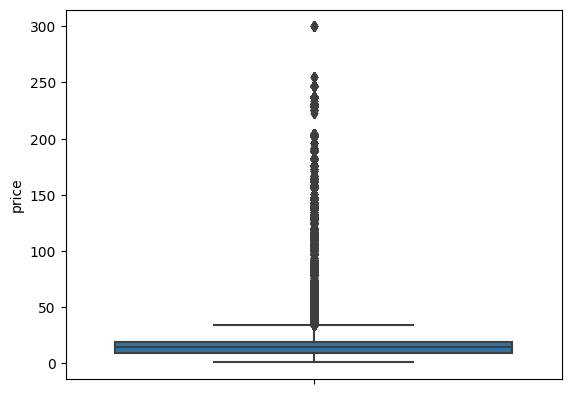

In [34]:
#examen de price car il semble y avoir au moins un abérrant
sns.boxplot(data=table_fus, y='price')


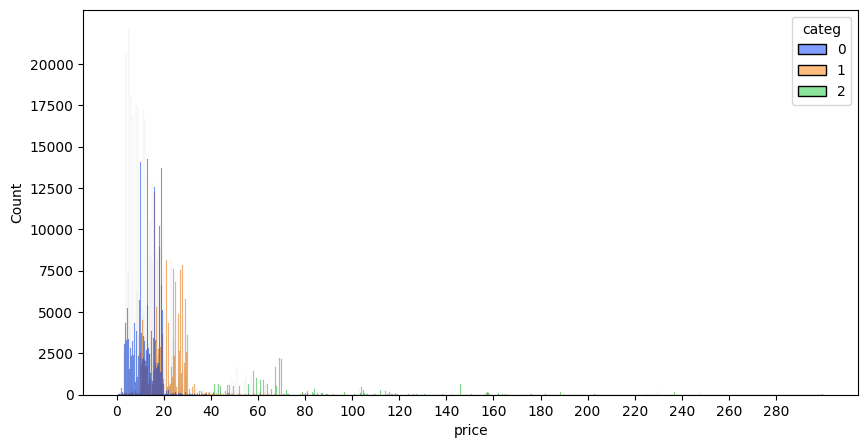

In [35]:
#répartition des prix des articles par catégorie
plt.figure(figsize=(10, 5))
sns.histplot(data=table_fus, x='price', hue='categ', palette='bright')
plt.xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280])
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500,20000])
plt.show()


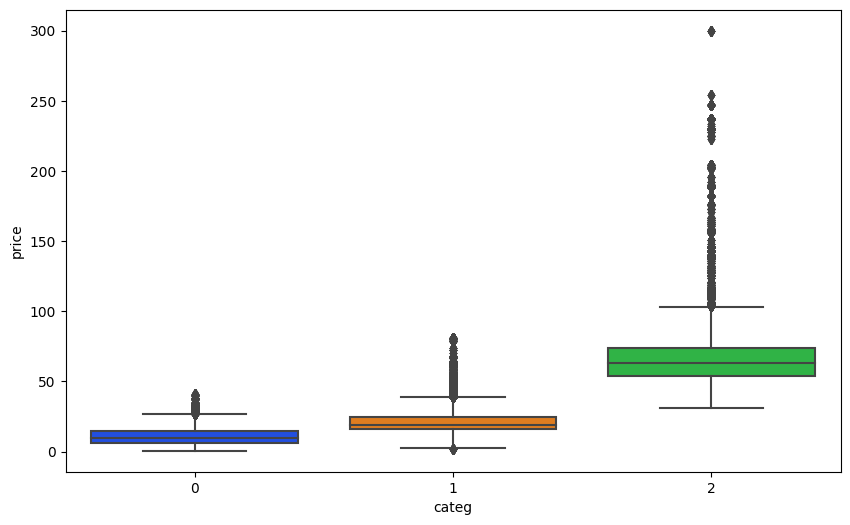

In [36]:
#boite a moustache par categorie

plt.figure(figsize=(10, 6))
sns.boxplot(data=table_fus, x='categ', y='price',palette='bright')
plt.show()

Il semble y avoir des prix potentiellement aberrant pour chaque catégorie de livre
Sans avoir d'information sur la désignation des articles il n'est pas possible de dire si les prix aberrant sont justifiées.

In [37]:
aberrant = table_fus[
    ((table_fus['categ'] == 0) & (table_fus['price'] > 30)) |
    ((table_fus['categ'] == 1) & (table_fus['price'] > 40)) |
    ((table_fus['categ'] == 2) & (table_fus['price'] > 100))
]

col = ['id_prod', 'categ', 'price']
aberrant_unique = aberrant[col].drop_duplicates('id_prod')
aberrant_unique = aberrant_unique.sort_values('id_prod')
aberrant_unique.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/Aberrant.xlsx')


In [38]:
aberrant_unique

,id_prod,categ,price
28892,0_1012,0,32.40
40401,0_1024,0,30.11
136760,0_1098,0,31.25
13124,0_1161,0,31.99
122861,0_1164,0,31.23
...,...,...,...
126710,2_89,2,107.99
64181,2_90,2,182.30
104254,2_94,2,145.45
34061,2_97,2,160.99


## **Calcul du chiffre d'affaire**

In [39]:
#calcul du chiffre d'affaire, du nombre de vente et du panier moyen
CA_total = table_fus['price'].sum()
nb_vente = table_fus['price'].count()
print("chiffre d'affaire total : ", CA_total, "Euro")
print('le nombre de vente total est de ',nb_vente)
print('le panier moyen est de : ', round((CA_total/nb_vente),2),'euro')

chiffre d'affaire total :  12022673.55 Euro
le nombre de vente total est de  687298
le panier moyen est de :  17.49 euro


In [40]:
table_fus.dtypes


id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
heure                 object
date1         datetime64[ns]
sex                   object
birth                  int64
price                float64
categ                  int64
dtype: object

## **Calcul du CA, du nombre de vente et du panier moyen par année**

In [41]:
# Ajout d'une colonne "année"
table_fus['année'] = table_fus['date1'].dt.year
table_fus['mois'] = table_fus['date1'].dt.strftime('%m')
# Ajout d'une colonne "jour"
table_fus['jour'] = table_fus['date1'].dt.day
table_fus.dropna(inplace=True)
table_fus['année'] = table_fus['année'].astype(int)
table_fus['jour'] = table_fus['jour'].astype(int)
# Création de la colonne "année_mois"
table_fus['année_mois'] = table_fus['année'].astype(str) + '-' + table_fus['mois'].astype(str)
table_fus


,id_prod,date,session_id,client_id,heure,date1,sex,birth,price,categ,année,mois,jour,année_mois
0,0_1259,2021-03-01,s_1,c_329,00:01:07.843138,2021-03-01,f,1967,11.99,0,2021,03,1,2021-03
1,0_1390,2021-03-01,s_2,c_664,00:02:26.047414,2021-03-01,m,1960,19.37,0,2021,03,1,2021-03
2,0_1352,2021-03-01,s_3,c_580,00:02:38.311413,2021-03-01,m,1988,4.50,0,2021,03,1,2021-03
3,0_1458,2021-03-01,s_4,c_7912,00:04:54.559692,2021-03-01,f,1989,6.55,0,2021,03,1,2021-03
4,0_1358,2021-03-01,s_5,c_2033,00:05:18.801198,2021-03-01,f,1956,16.49,0,2021,03,1,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687293,1_508,2023-02-28,s_348444,c_3573,23:49:03.148402,2023-02-28,f,1996,21.92,1,2023,02,28,2023-02
687294,2_37,2023-02-28,s_348445,c_50,23:51:29.318531,2023-02-28,f,1994,48.99,2,2023,02,28,2023-02
687295,1_695,2023-02-28,s_348446,c_488,23:53:18.929676,2023-02-28,f,1985,26.99,1,2023,02,28,2023-02
687296,0_1547,2023-02-28,s_348447,c_4848,23:58:00.107815,2023-02-28,m,1953,8.99,0,2023,02,28,2023-02


In [42]:
# chiffre d'affaire, nb vente, pannier moyen par an
table_fus['année']=round(table_fus['année'])
CA_année = table_fus['price'].groupby(table_fus['année']).sum()
nb_vente_année = table_fus['price'].groupby(table_fus['année']).count()
panier_année = CA_année / nb_vente_année
data = {
    'CA_année': CA_année,
    'nb_vente_année': nb_vente_année,
    'panier_année': panier_année
}
table_année= pd.DataFrame(data)
table_année.reset_index(inplace=True)


In [43]:
#CA par client
CA_client = table_fus['price'].groupby(table_fus['client_id']).sum()
CA_client= pd.DataFrame(CA_client)
CA_client.reset_index(inplace=True)
CA_client.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/chiffre d affaire par client.xlsx')


In [44]:
CA_client

,client_id,price
0,c_1,629.02
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2291.88
4,c_1001,1823.85
...,...,...
8595,c_995,189.41
8596,c_996,1637.34
8597,c_997,1490.01
8598,c_998,2822.22


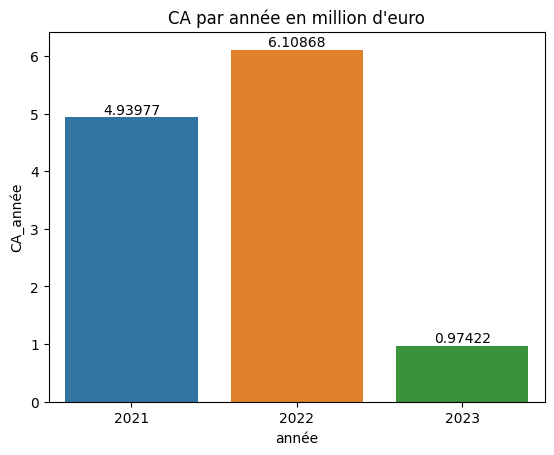

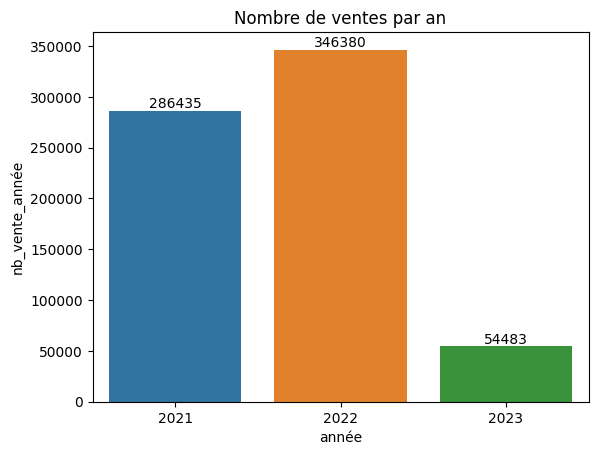

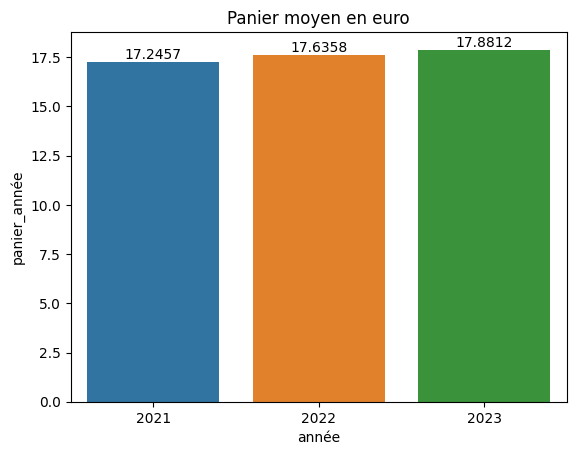

In [45]:
#conversion des CA pour le graphique
table_année['CA_année'] = table_année['CA_année'] / 1e+06
# graphe CA par an
ax=sns.barplot(data=table_année, x=table_année['année'], y='CA_année')
plt.title("CA par année en million d'euro")
for i in ax.containers:
   ax.bar_label(i)
plt.show()
# graphe nb de vente par an
ax=sns.barplot(data=table_année, x=table_année['année'], y='nb_vente_année')
for i in ax.containers:
   ax.bar_label(i)
plt.title('Nombre de ventes par an')
plt.show()
#graphe pannier moyen
ax=sns.barplot(data=table_année, x=table_année['année'], y='panier_année')
for i in ax.containers:
   ax.bar_label(i)
plt.title('Panier moyen en euro')
plt.show()



In [46]:
# calcul du nombre de clients
nb_client = len(pd.unique(table_fus['client_id']))
print(' Nombre total des clients : ',nb_client)


 Nombre total des clients :  8600


In [47]:
# date de début et date de fin des données
table_fus_categ1 = table_fus[table_fus['categ']==1]
print('Les datas commencent le : ',table_fus_categ1['date1'].min())
print('Les datas finissent le : ',table_fus_categ1['date1'].max())

Les datas commencent le :  2021-03-01 00:00:00
Les datas finissent le :  2023-02-28 00:00:00


In [48]:
#estimation du CA 2023 en extrapolant les ventes des 2 premiers mois
print('Les datas commencent le : ',table_fus['date1'].min())
print('Les datas finissent le : ',table_fus['date1'].max())
print('CA 2023 estimé', 0.97422*6, 'millions euro')


Les datas commencent le :  2021-03-01 00:00:00
Les datas finissent le :  2023-02-28 00:00:00
CA 2023 estimé 5.84532 millions euro


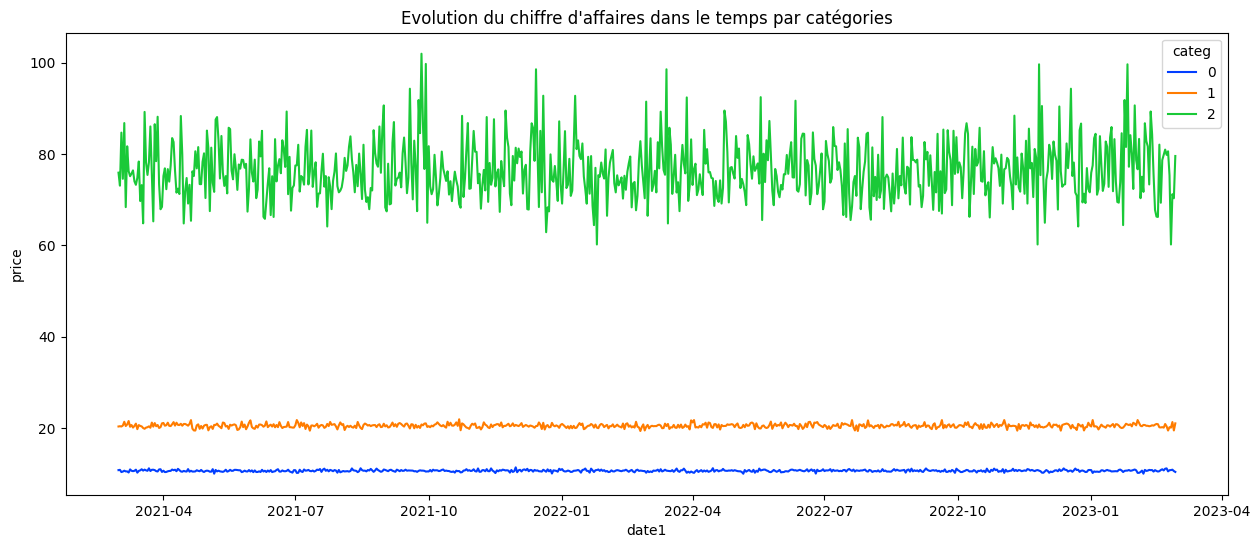

In [49]:
# evolution du chiffre d'affairee dans le temps par catégorie
plt.figure(figsize=(15, 6))
sns.lineplot(data=table_fus, x='date1', y='price', hue='categ', palette='bright', errorbar=None)
plt.title("Evolution du chiffre d'affaires dans le temps par catégories")
plt.show()

In [50]:
table_fus

,id_prod,date,session_id,client_id,heure,date1,sex,birth,price,categ,année,mois,jour,année_mois
0,0_1259,2021-03-01,s_1,c_329,00:01:07.843138,2021-03-01,f,1967,11.99,0,2021,03,1,2021-03
1,0_1390,2021-03-01,s_2,c_664,00:02:26.047414,2021-03-01,m,1960,19.37,0,2021,03,1,2021-03
2,0_1352,2021-03-01,s_3,c_580,00:02:38.311413,2021-03-01,m,1988,4.50,0,2021,03,1,2021-03
3,0_1458,2021-03-01,s_4,c_7912,00:04:54.559692,2021-03-01,f,1989,6.55,0,2021,03,1,2021-03
4,0_1358,2021-03-01,s_5,c_2033,00:05:18.801198,2021-03-01,f,1956,16.49,0,2021,03,1,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687293,1_508,2023-02-28,s_348444,c_3573,23:49:03.148402,2023-02-28,f,1996,21.92,1,2023,02,28,2023-02
687294,2_37,2023-02-28,s_348445,c_50,23:51:29.318531,2023-02-28,f,1994,48.99,2,2023,02,28,2023-02
687295,1_695,2023-02-28,s_348446,c_488,23:53:18.929676,2023-02-28,f,1985,26.99,1,2023,02,28,2023-02
687296,0_1547,2023-02-28,s_348447,c_4848,23:58:00.107815,2023-02-28,m,1953,8.99,0,2023,02,28,2023-02


In [51]:
#export en excel de table_fus (a activer en cas de besoin car long)
#table_fus.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/table_fus.xlsx')

<ipython-input-52-8ab3a361aad6>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=table_fus_mois, x='année_mois', y='price',  palette='bright', errorbar=None)  #hue='année',


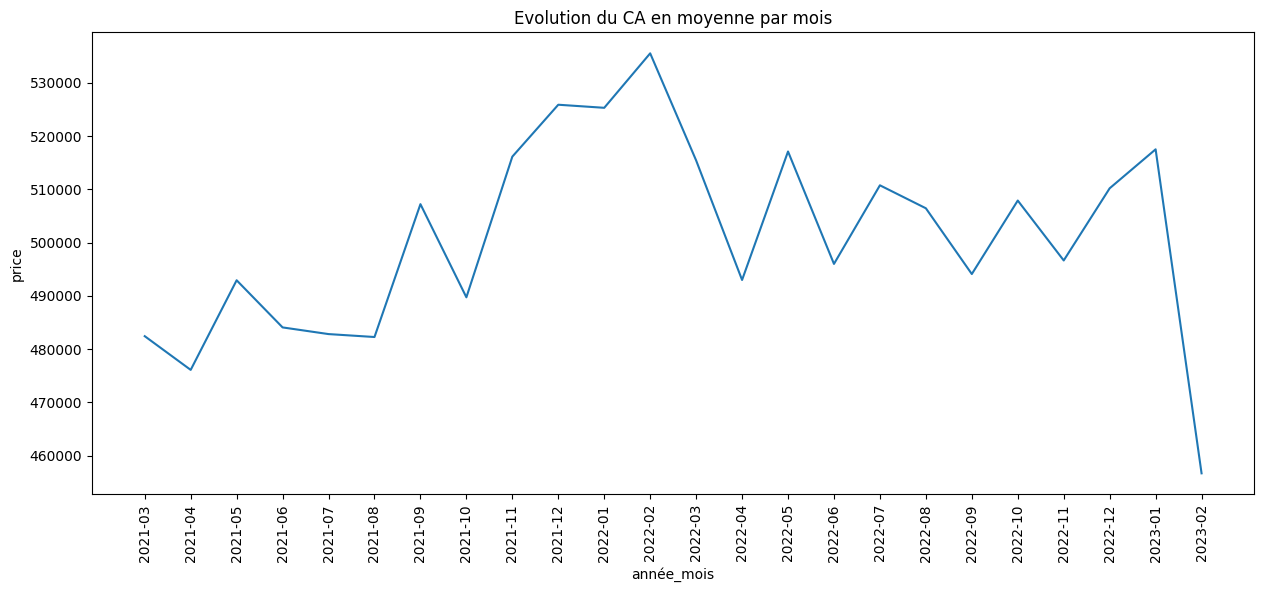

In [52]:
#meme graphe mais avec toutes les catégories ensemble en différenciant les années
plt.figure(figsize=(15, 6))
table_fus_mois = table_fus.groupby(['année', 'mois'])['price'].sum().reset_index()
table_fus_mois['année_mois'] = table_fus_mois['année'].astype(str) + '-' + table_fus_mois['mois'].astype(str)
sns.lineplot(data=table_fus_mois, x='année_mois', y='price',  palette='bright', errorbar=None)  #hue='année',
plt.xticks(rotation=90)
plt.title('Evolution du CA en moyenne par mois')
plt.show()

<ipython-input-53-18b6e6b15755>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=table_fus_mois, x='année_mois', y='price', palette='bright', errorbar=None)


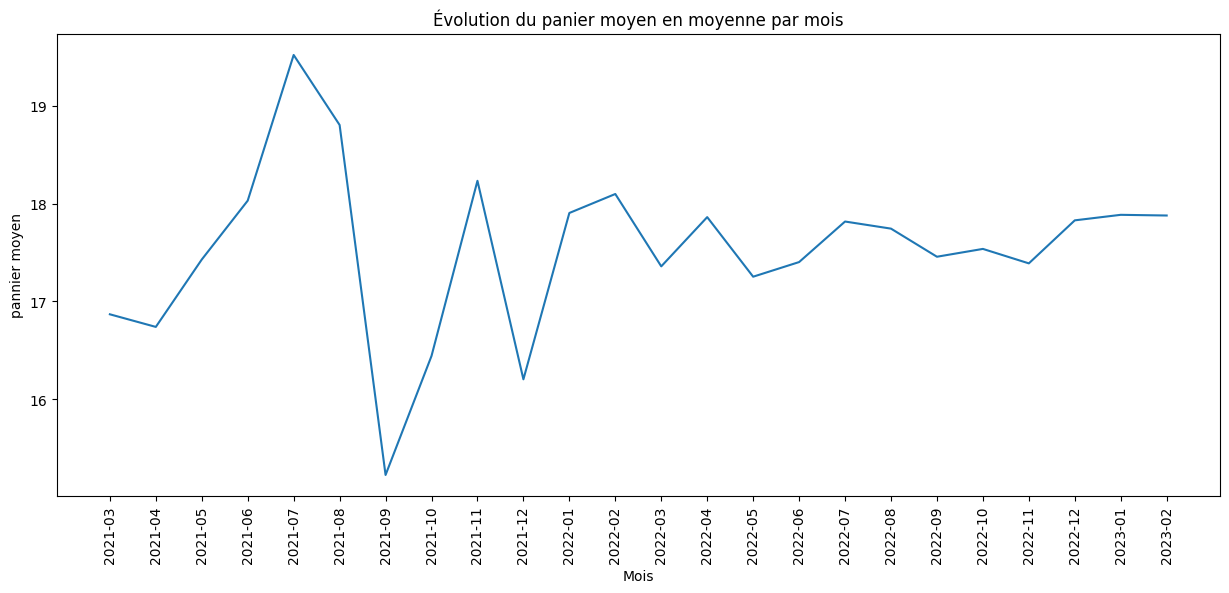

In [53]:
#Evolution du panier moyen par mois
plt.figure(figsize=(15, 6))
table_fus_mois = table_fus.groupby(['année','année_mois'])['price'].mean().reset_index()
sns.lineplot(data=table_fus_mois, x='année_mois', y='price', palette='bright', errorbar=None)
plt.title('Évolution du panier moyen en moyenne par mois')
plt.xlabel('Mois')
plt.ylabel('pannier moyen')
plt.xticks(rotation=90)
plt.show()

<ipython-input-54-f6ee9fd26a75>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=table_fus_mois, x='année_mois', y='price', palette='bright', errorbar=None, ax=ax1, label="Chiffre d'affaire")
<ipython-input-54-f6ee9fd26a75>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


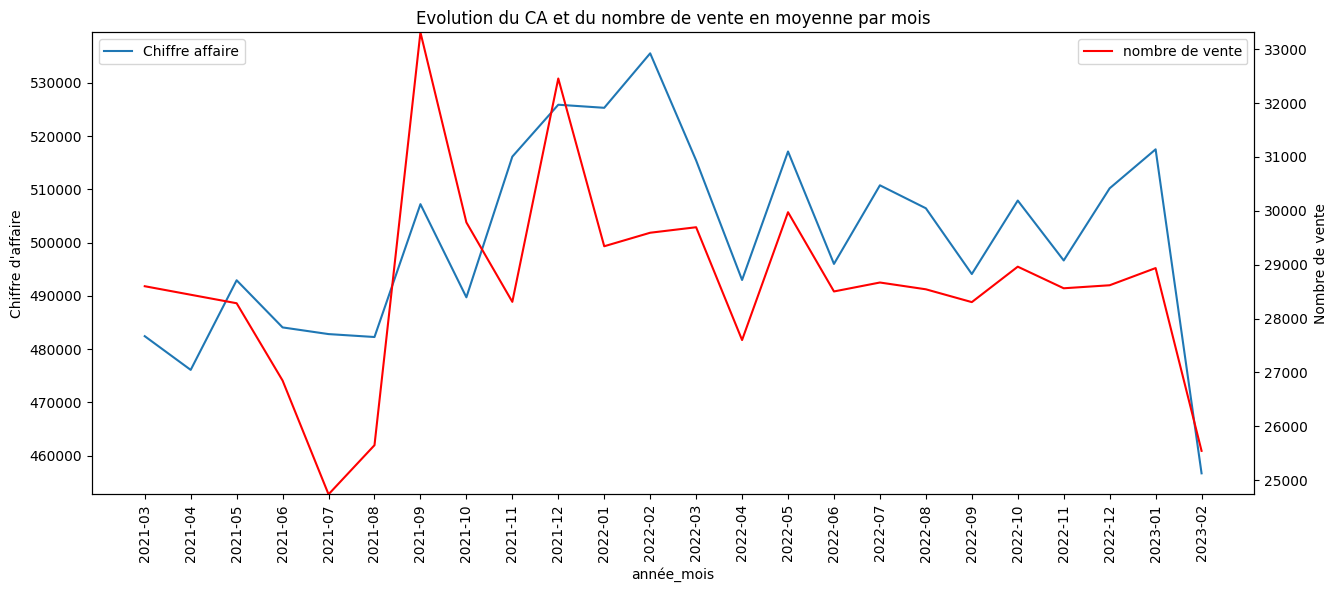

In [54]:
#combinaison des du CA et du nombre de vente dans un seul graphique
plt.figure(figsize=(15, 6))
table_fus_mois = table_fus.groupby(['année', 'mois'])['price'].sum().reset_index()
#table_fus_mois.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/CA par produit.xlsx')
table_fus_mois['année_mois'] = table_fus_mois['année'].astype(str) + '-' + table_fus_mois['mois'].astype(str)

ax1 = plt.gca()
ax2 = ax1.twinx()
sns.lineplot(data=table_fus_mois, x='année_mois', y='price', palette='bright', errorbar=None, ax=ax1, label="Chiffre d'affaire")

table_fus_mois = table_fus.groupby(['année', 'année_mois'])['price'].count().reset_index()
sns.lineplot(data=table_fus_mois, x='année_mois', y='price', color='red', errorbar=None, ax=ax2, label='nombre de vente')

ax2.set_ylim([min(table_fus_mois['price']), max(table_fus_mois['price'])])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Evolution du CA et du nombre de vente en moyenne par mois')
ax1.legend(['Chiffre affaire'], loc='upper left')  # Légende pour l'axe principal (à gauche)
ax2.legend(['nombre de vente'], loc='upper right')  # Légende pour l'axe secondaire (à droite)
ax1.set_ylabel ("Chiffre d'affaire")
ax2.set_ylabel('Nombre de vente')
plt.show()


<ipython-input-55-e1b91f0292c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_unique['age'] = 2023 - clients_unique['birth']


Text(0.5, 1.0, "Repartition de l'age des clients (clients unique)")

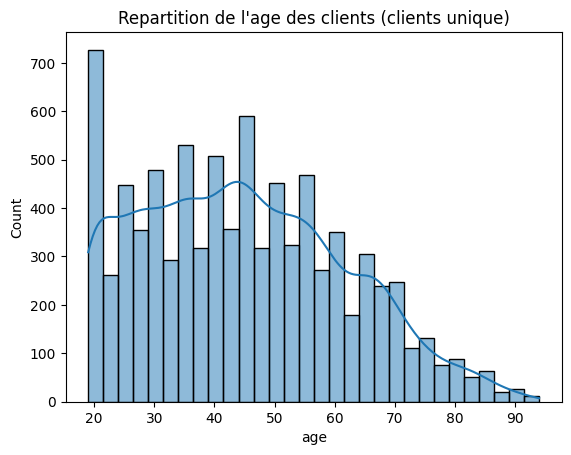

In [55]:
#analyse de la repartition de l'age des clients
clients_unique = table_fus.drop_duplicates(subset='client_id', keep='first')
clients_unique['age'] = 2023 - clients_unique['birth']
sns.histplot(data=clients_unique, x=clients_unique['age'], kde=True)
plt.title("Repartition de l'age des clients (clients unique)")

Visuellement la répartition de l'age des clients ne suit pas la loie normale

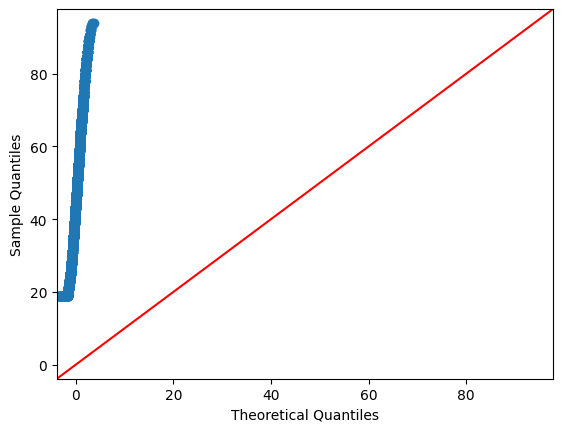

In [56]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(clients_unique['age'], line ='45')
py.show()

Le qq plot ne montre pas que l'age des clients suit la loie normale

In [57]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
# Niveau de signification (alpha)
alpha = 0.05

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(clients_unique['age'])
ad_test = stats.anderson(clients_unique['age'], dist='norm')
dagostino_test = stats.normaltest(clients_unique['age'])
lilliefors_test = lilliefors(clients_unique['age'], dist='norm')
ks_test = stats.kstest(clients_unique['age'], 'norm')
# Créer un tableau pandas avec les résultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})

print(test_results)


          Nom du test  Statistique de test       p-valeur Normalité
0        Shapiro-Wilk             0.969745   4.618240e-39       Non
1  Kolmogorov-Smirnov             1.000000   0.000000e+00       Non
2    Anderson-Darling            53.735672            NaN       Non
3  D'Agostino-Pearson           503.972109  3.663086e-110       Non
4          Lilliefors             0.063974   1.000000e-03       Non


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les différents test de normalité confirment que la distribution des ages n'est pas *normale*

## **Evolution du nombre de vente par date**

<ipython-input-58-9f95a30ba40d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_mois.sort_values(by=['année_mois'], inplace=True)
<ipython-input-58-9f95a30ba40d>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=moy_mois_groupe, x='année_mois', y='moyenne_mois', errorbar=None, palette=palette)


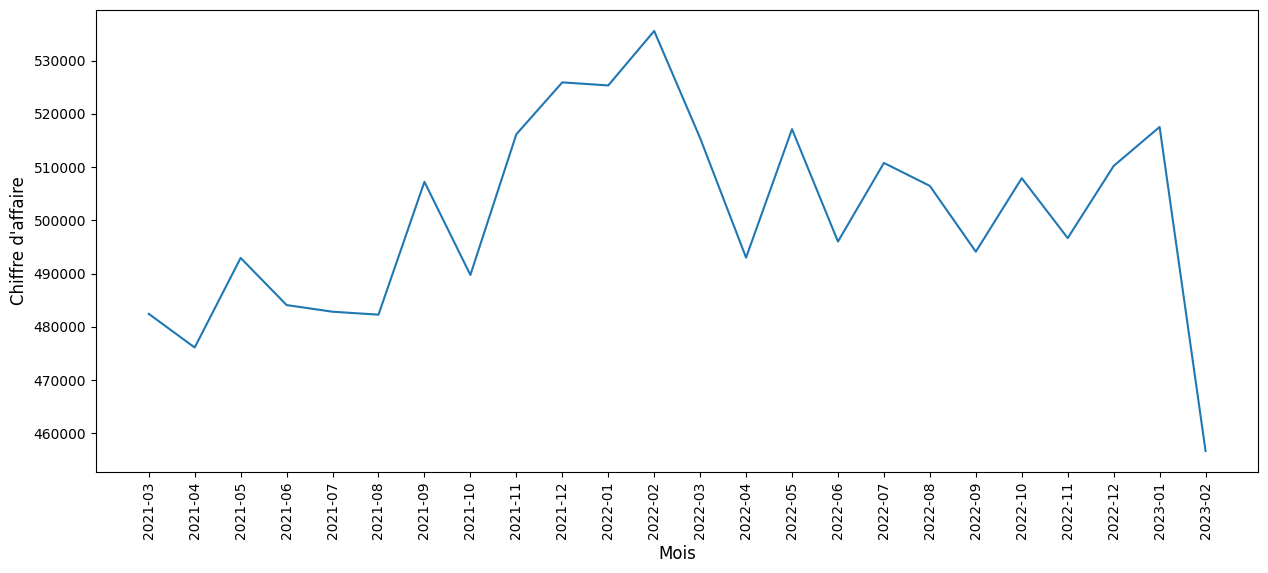

In [58]:
moy_mois = table_fus[['année_mois', 'price']]
moy_mois.sort_values(by=['année_mois'], inplace=True)
moy_mois_groupe = moy_mois.groupby('année_mois')['price'].mean().reset_index()
moy_mois_groupe['moyenne_mois'] = moy_mois.groupby('année_mois')['price'].sum().reset_index(drop=True)
moy_mois_groupe.dropna(inplace=True)
moy_mois_groupe.sort_values(by=['année_mois'], inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
palette = sns.color_palette("Blues", 1)
ax = sns.lineplot(data=moy_mois_groupe, x='année_mois', y='moyenne_mois', errorbar=None, palette=palette)
for i in ax.containers:
   ax.bar_label(i,fontsize=7)
plt.xlabel('Mois', fontsize=12)
plt.ylabel("Chiffre d'affaire",fontsize=12)
plt.show()

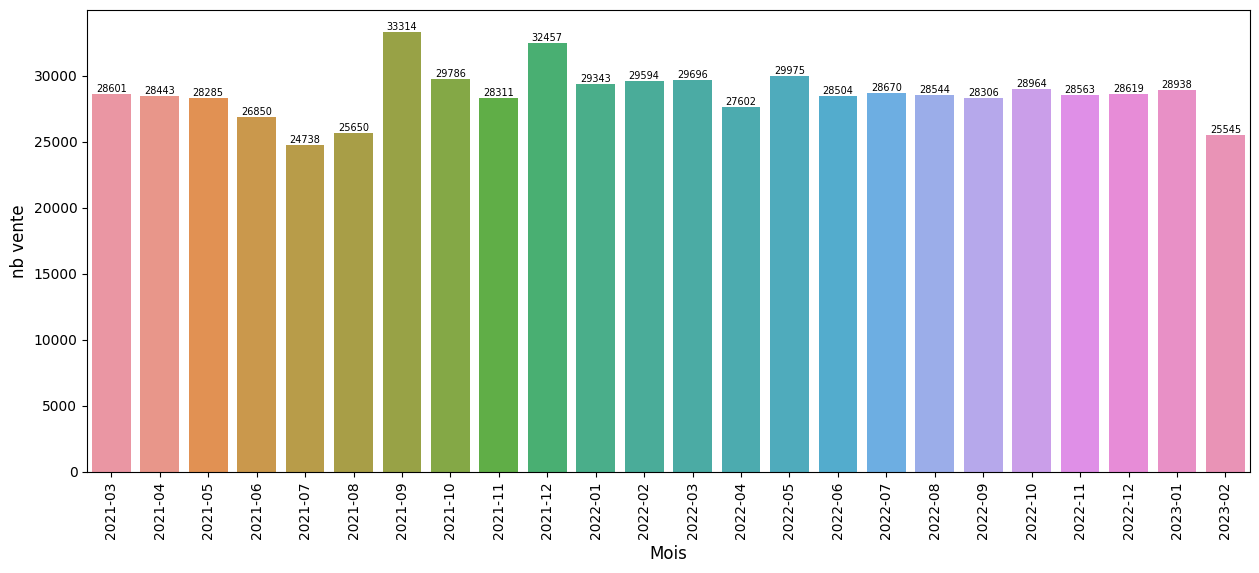

In [59]:
#evolution du nb vente par mois
moy_mois_nbvente_groupe = moy_mois.groupby('année_mois')['price'].count().reset_index()
moy_mois_nbvente_groupe['nb_vente'] = moy_mois.groupby('année_mois')['price'].count().reset_index(drop=True)
moy_mois_nbvente_groupe.dropna(inplace=True)
moy_mois_nbvente_groupe.sort_values(by=['année_mois'], inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
ax = sns.barplot(data=moy_mois_nbvente_groupe, x='année_mois', y='nb_vente', errorbar=None)
for i in ax.containers:
   ax.bar_label(i,fontsize=7)
plt.xlabel('Mois', fontsize=12)
plt.ylabel("nb vente",fontsize=12)
plt.show()

<ipython-input-60-39d4874e539c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_mob.sort_values(by=['date1'], inplace=True)


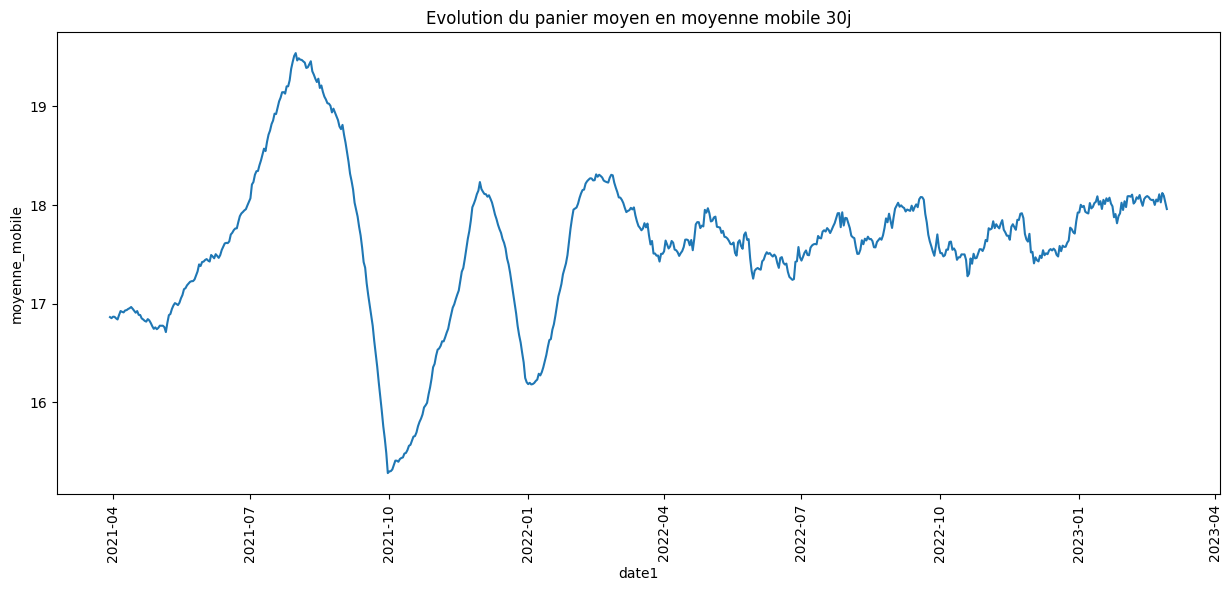

In [60]:
#moyenne mobile du panier moyen
moy_mob = table_fus[['date1', 'price']]
moy_mob.sort_values(by=['date1'], inplace=True)
moy_mob_groupe = moy_mob.groupby('date1')['price'].mean().reset_index()
moy_mob_groupe['moyenne_mobile'] = moy_mob_groupe['price'].rolling(30).mean().reset_index(drop=True)
moy_mob_groupe.dropna(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
sns.lineplot(data=moy_mob_groupe, x='date1', y='moyenne_mobile', errorbar=None)
plt.title("Evolution du panier moyen en moyenne mobile 30j")
plt.show()

<ipython-input-61-348d3d5b0eb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_mob_ca.sort_values(by=['date1'], inplace=True)


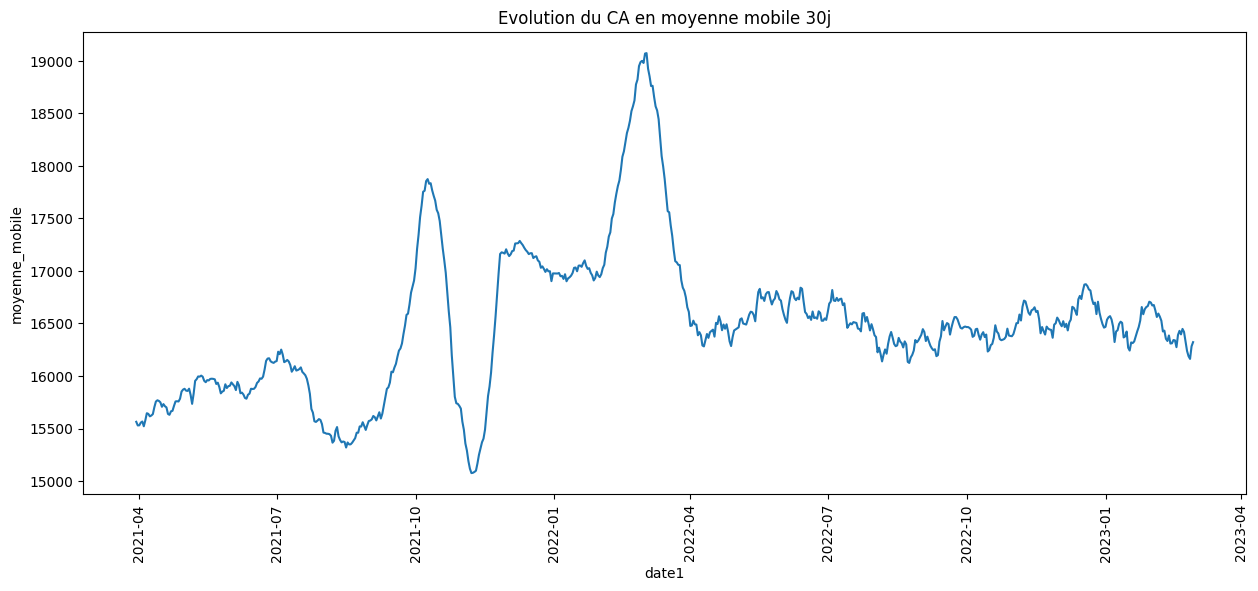

In [61]:
# calcul de la moyenne mobile du CA
moy_mob_ca = table_fus[['date1', 'price']]
moy_mob_ca.sort_values(by=['date1'], inplace=True)
moy_mob_ca_groupe = moy_mob_ca.groupby('date1')['price'].sum().reset_index()
moy_mob_ca_groupe['moyenne_mobile'] = moy_mob_ca_groupe['price'].rolling(30).mean().reset_index(drop=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
sns.lineplot(data=moy_mob_ca_groupe, x='date1', y='moyenne_mobile', errorbar=None)
plt.title("Evolution du CA en moyenne mobile 30j")
plt.show()


<ipython-input-62-ca52afb1f272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_mob['nb_vente'] = moy_mob['session_id'].count
<ipython-input-62-ca52afb1f272>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_mob.sort_values(by=['date1'], inplace=True)


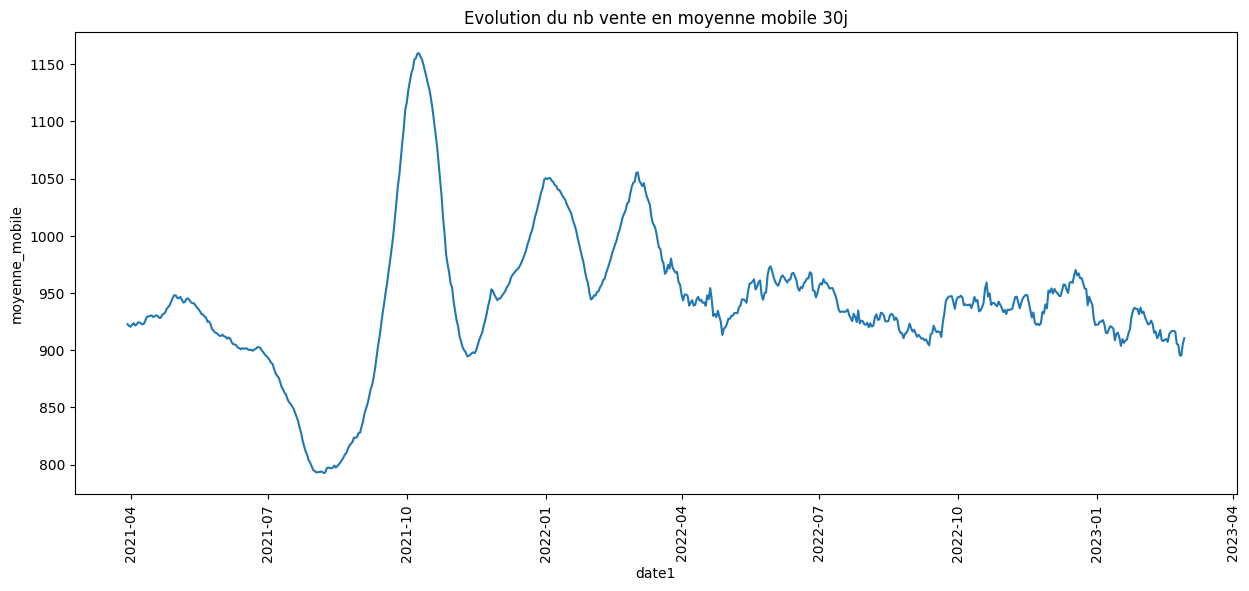

In [62]:
# calcul du nb vente en moyenne mobile
moy_mob = table_fus[['date1', 'session_id']]
moy_mob['nb_vente'] = moy_mob['session_id'].count
moy_mob.sort_values(by=['date1'], inplace=True)
moy_mob_groupe = moy_mob.groupby('date1')['nb_vente'].count().reset_index()
moy_mob_groupe['moyenne_mobile'] = moy_mob_groupe['nb_vente'].rolling(30).mean().reset_index(drop=True)
moy_mob_groupe.dropna(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
sns.lineplot(data=moy_mob_groupe, x='date1', y='moyenne_mobile', errorbar=None)
plt.title("Evolution du nb vente en moyenne mobile 30j")
plt.show()


In [63]:
moy_mob_groupe

,date1,nb_vente,moyenne_mobile
29,2021-03-30,897,922.733333
30,2021-03-31,919,921.300000
31,2021-04-01,916,920.533333
32,2021-04-02,960,922.166667
33,2021-04-03,947,923.633333
...,...,...,...
725,2023-02-24,894,904.800000
726,2023-02-25,905,895.466667
727,2023-02-26,890,895.400000
728,2023-02-27,1110,905.600000


## **Top et flop des références**

In [64]:
table_ref = table_fus.groupby(['categ','id_prod'])['price'].sum().reset_index()


In [65]:
table_ref.sort_values(['categ','price'])

,categ,id_prod,price
595,0,0_1539,0.99
313,0,0_1284,1.38
719,0,0_1653,1.98
665,0,0_1601,1.99
1784,0,0_541,1.99
...,...,...,...
3152,2,2_209,56971.86
3034,2,2_102,60736.78
3045,2,2_112,65407.76
3070,2,2_135,69334.95


In [66]:
#flop 10 de la catédorie 0
categ0 = table_ref.where(table_ref['categ']==0)
categ0 = categ0.sort_values(by='price')
categ0.head(10)

,categ,id_prod,price
595,0.0,0_1539,0.99
313,0.0,0_1284,1.38
719,0.0,0_1653,1.98
2079,0.0,0_807,1.99
665,0.0,0_1601,1.99
1784,0.0,0_541,1.99
802,0.0,0_1728,2.27
549,0.0,0_1498,2.48
2179,0.0,0_898,2.54
925,0.0,0_1840,2.56


In [67]:
#top 10 de la catégorie 0
categ0.dropna(inplace=True)
categ0.tail(10).sort_values(by='price', ascending=False)

,categ,id_prod,price
487,0.0,0_1441,23452.65
465,0.0,0_1421,23008.49
457,0.0,0_1414,22287.00
498,0.0,0_1451,21689.15
460,0.0,0_1417,21372.12
494,0.0,0_1448,20701.42
519,0.0,0_1470,20194.02
475,0.0,0_1430,20109.87
389,0.0,0_1353,19430.28
391,0.0,0_1355,19312.83


In [68]:
#flop 10 de la catédorie 1
categ1 = table_ref.where(table_ref['categ']==1)
categ1 = categ1.sort_values(by='price')
categ1.head(10)

,categ,id_prod,price
2648,1.0,1_420,14.24
2431,1.0,1_224,19.80
2703,1.0,1_470,21.64
2706,1.0,1_473,26.91
2630,1.0,1_404,29.55
2332,1.0,1_135,39.95
2623,1.0,1_399,43.89
2749,1.0,1_511,44.85
2652,1.0,1_424,49.10
2726,1.0,1_491,49.90


In [69]:
#top 10 de la catégorie 1
categ1.dropna(inplace=True)
categ1.tail(10).sort_values(by='price', ascending=False)

,categ,id_prod,price
2619,1.0,1_395,56588.48
2591,1.0,1_369,56088.62
2607,1.0,1_383,53805.44
2641,1.0,1_414,53498.35
2733,1.0,1_498,51414.00
2632,1.0,1_406,49669.62
2588,1.0,1_366,48689.24
2609,1.0,1_385,48523.33
2660,1.0,1_431,48366.72
2602,1.0,1_379,47853.27


In [70]:
#flop 10 de la catédorie 2
categ2 = table_ref.where(table_ref['categ']==2)
categ2 = categ2.sort_values(by='price')
categ2.head(10)

,categ,id_prod,price
3247,2.0,2_81,86.99
3175,2.0,2_23,115.99
3263,2.0,2_98,149.74
3258,2.0,2_93,157.98
3039,2.0,2_107,203.94
3242,2.0,2_77,291.98
3188,2.0,2_27,295.96
3189,2.0,2_28,310.50
3056,2.0,2_122,350.00
3066,2.0,2_131,383.97


In [71]:
#top 10 de la catégorie 2
categ2.dropna(inplace=True)
categ2.tail(10).sort_values(by='price', ascending=False)


,categ,id_prod,price
3096,2.0,2_159,94893.50
3070,2.0,2_135,69334.95
3045,2.0,2_112,65407.76
3034,2.0,2_102,60736.78
3152,2.0,2_209,56971.86
3043,2.0,2_110,53846.25
3201,2.0,2_39,53060.85
3104,2.0,2_166,52449.12
3206,2.0,2_43,49972.86
3145,2.0,2_202,46217.88


In [72]:
#sauvegarde excel du CA par categorie de produit
categ0.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/CA par produit categ0.xlsx')
categ1.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/CA par produit categ1.xlsx')
categ2.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/CA par produit categ2.xlsx')

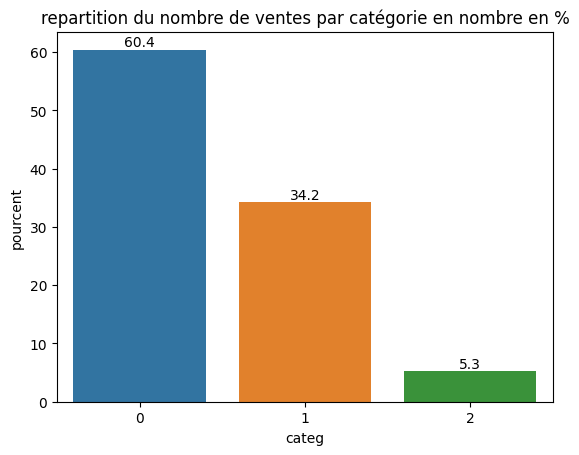

In [73]:
#repartition des vente par categorie en nb vente
nbvente = table_fus[['client_id', 'sex', 'categ']]
nbvente = nbvente.groupby('categ')['sex'].count().reset_index()
nbvente['pourcent'] = round(((nbvente['sex'] / nbvente['sex'].sum()) * 100),1)

ax= sns.barplot(data=nbvente, x='categ', y='pourcent')
ax.set(title="repartition du nombre de ventes par catégorie en nombre en %")
for i in ax.containers:
   ax.bar_label(i)
plt.show()

In [74]:
nbvente

,categ,sex,pourcent
0,0,415459,60.4
1,1,235356,34.2
2,2,36483,5.3


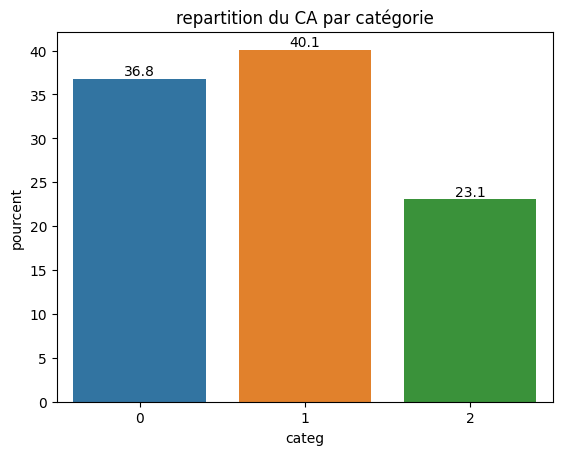

In [75]:
#repartition des vente par categorie en somme des prix
vente = table_fus[['client_id', 'price', 'categ']]
vente = vente.groupby('categ')['price'].sum().reset_index()
vente['pourcent'] = round(((vente['price'] / vente['price'].sum()) * 100),1)

ax= sns.barplot(data=vente, x='categ', y='pourcent')
ax.set(title="repartition du CA par catégorie")
for i in ax.containers:
   ax.bar_label(i)
plt.show()

<ipython-input-76-76d2eceae4fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vente.dropna(inplace=True)
<ipython-input-76-76d2eceae4fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vente['année'] = vente['année'].astype(int)


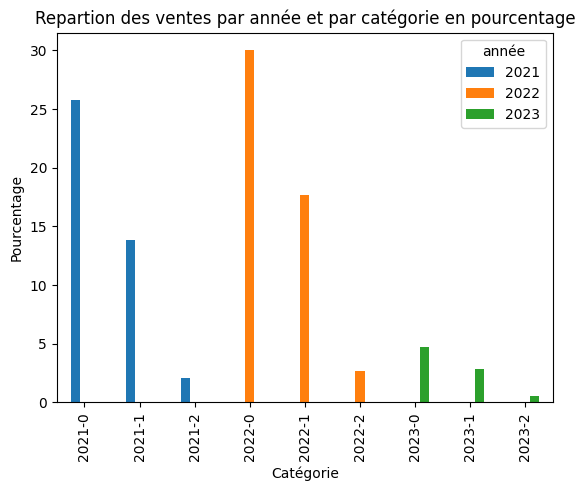

In [76]:
#repartition des ventes par années et par catégorie en pourcentage
vente = table_fus[['client_id', 'sex', 'categ','année']]
vente.dropna(inplace=True)
vente['année'] = vente['année'].astype(int)
vente = vente.groupby(['année','categ'])['sex'].count().reset_index()
vente['pourcent'] = round(((vente['sex'] / vente['sex'].sum()) * 100),1)
vente['année_categ'] = vente['année'].astype(str) + '-' + vente['categ'].astype(str)
pourcent_pivot = vente.pivot_table(index='année_categ', columns='année', values='pourcent')
ax = pourcent_pivot.plot(kind='bar')
ax.set_xlabel('Catégorie')
ax.set_ylabel('Pourcentage')
ax.set(title="Repartion des ventes par année et par catégorie en pourcentage")
plt.show()

## **Nombre de vente par produit**

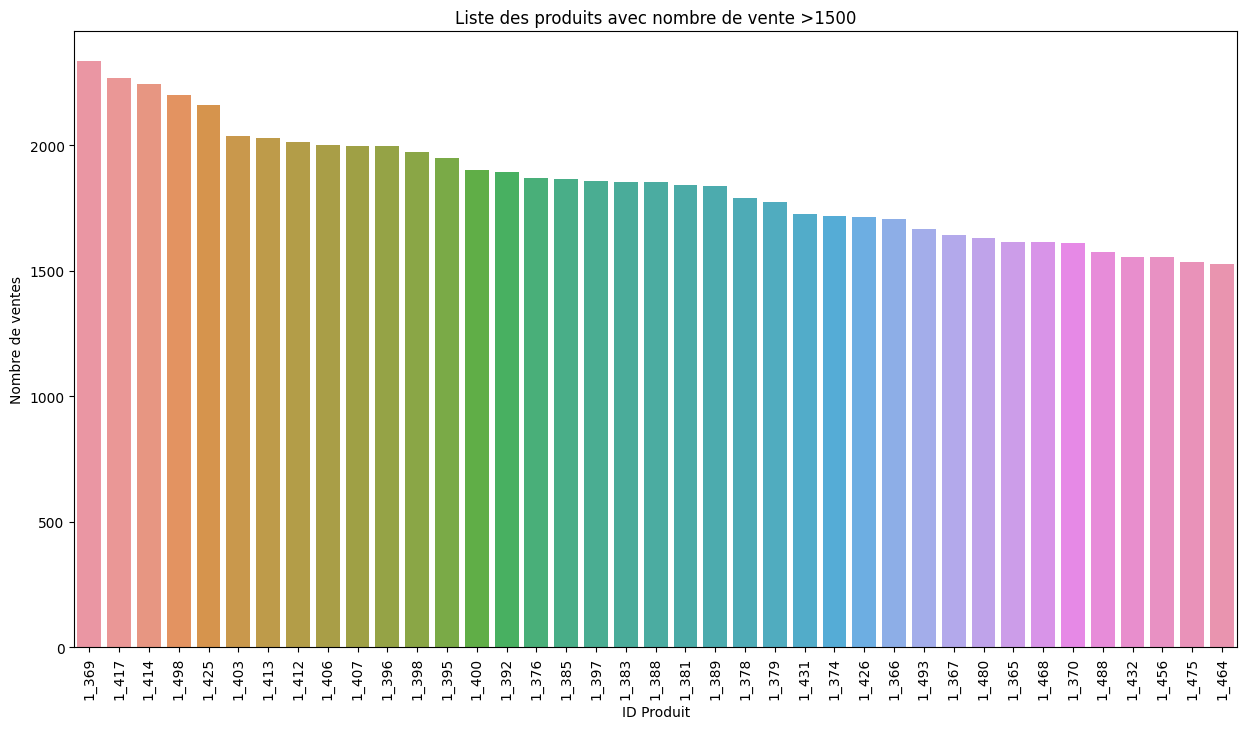

In [77]:
#produit dont le nombre de vente >1500
nb_vente = table_fus.groupby('id_prod').size().reset_index(name='count')
#sauvegarde du fichier nombre de vente par produit
nb_vente.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/nombre de vente par produit.xlsx')

#choix arbitraire d'afficher que les produits dont les nombre de vente est > 1500
nb_vente = nb_vente.where(nb_vente['count']>=1500)
nb_vente = nb_vente.sort_values('count', ascending=False)
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=nb_vente, x='id_prod', y='count')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=90)
ax.set(title="Liste des produits avec nombre de vente >1500")
plt.show()

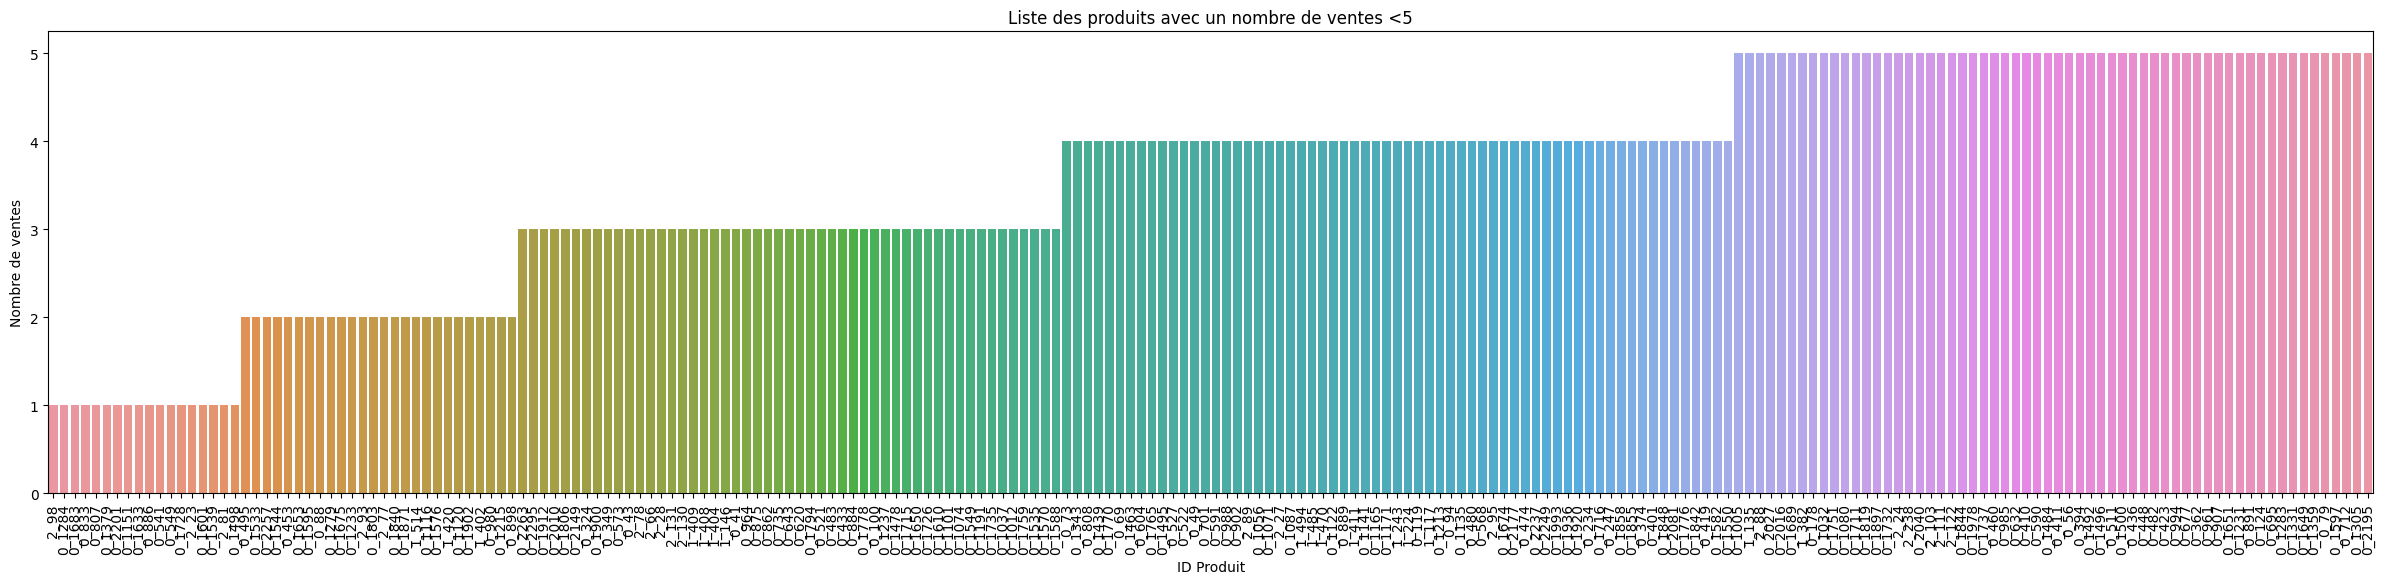

In [78]:
#produits avec nombre de vente<=5
nb_vente = table_fus.groupby('id_prod').size().reset_index(name='count')
nb_vente = nb_vente.where(nb_vente['count']<=5)
nb_vente  = nb_vente.sort_values('count')
plt.figure(figsize=(30, 6))
ax=sns.barplot(data=nb_vente, x='id_prod', y='count')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de ventes')
ax.set(title="Nombre de ventes <5")
plt.title('Liste des produits avec un nombre de ventes <5')
plt.xticks(rotation=90)
plt.show()

## Calcul de la courbe de lorentz des achats

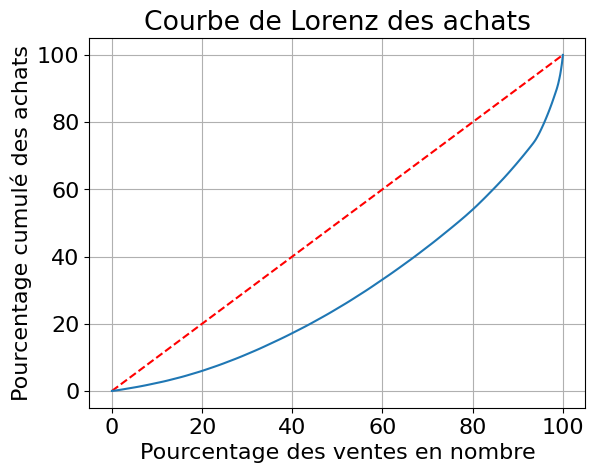

In [119]:

achat = table_fus[table_fus['price'] > 0]
ach = achat['price'].values
n = len(ach)
lorenz = np.cumsum(np.sort(ach)) / ach.sum()
lorenz = np.append([0], lorenz)
# Calcul des pourcentages pour les axes X et Y
pourcentages_ventes = np.linspace(0, 100, n + 1)
pourcentages_cumules = lorenz * 100

plt.plot([0, 100], [0, 100], linestyle='dashed', color='red')
plt.plot(pourcentages_ventes, pourcentages_cumules, drawstyle='steps-post')
plt.title("Courbe de Lorenz des achats")
plt.xlabel("Pourcentage des ventes en nombre")
plt.ylabel("Pourcentage cumulé des achats")
plt.grid(True)
plt.show()


In [120]:
#calcul de l'indice de gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini= 2*S
round(gini,2)

0.39

In [81]:
#nombre de session par client

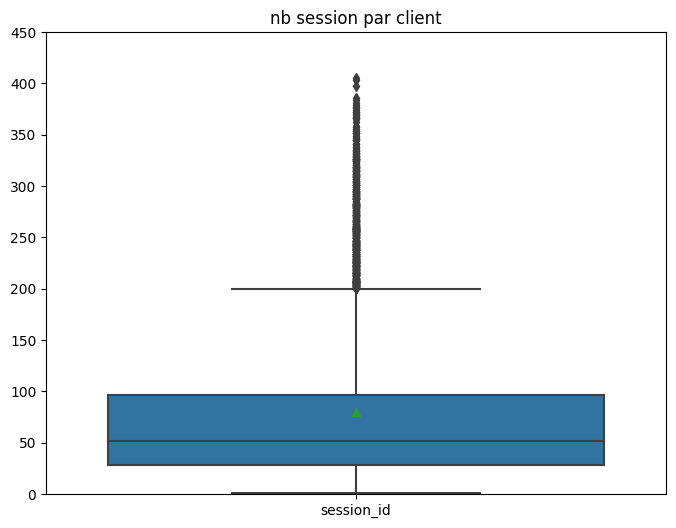

In [82]:
nb_session = table_fus[['client_id','price','categ','session_id']]
nb_session = nb_session.groupby('client_id')['session_id'].count().reset_index()
plt.figure(figsize=(8, 6))
ax= sns.boxplot(data = nb_session,showmeans=True)
ax.set_ylim(0, 450)
plt.title('nb session par client')
plt.show()

In [83]:
#sauvegarde dans excel du nombre de session par client
nb_session.to_excel('/content/drive/MyDrive/Colab Notebooks/Projet 6/nombre de session par client.xlsx')

In [84]:
nb_session = nb_session.sort_values('session_id', ascending=False)
top_10_session = nb_session.head(10)
flop_10_session = nb_session.tail(40)

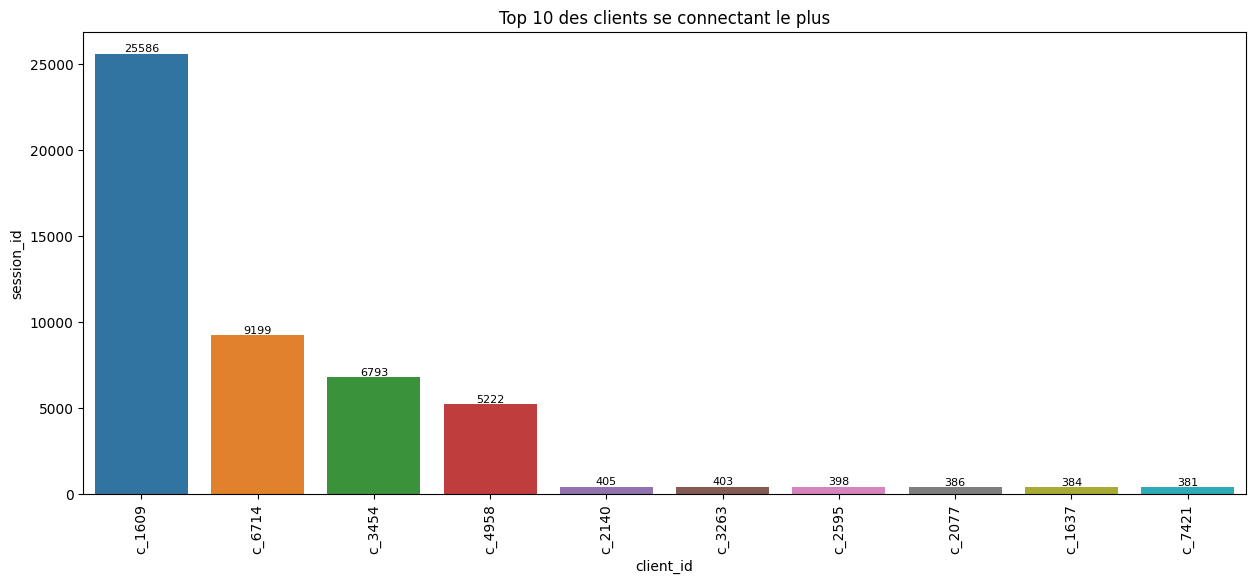

In [85]:
#client se connectant le plus
plt.figure(figsize=(15, 6))
ax= sns.barplot(data = top_10_session, x='client_id', y='session_id')
for i in ax.containers:
   ax.bar_label(i, fontsize=8)
plt.title('Top 10 des clients se connectant le plus')
plt.xticks(rotation=90)
plt.show()

In [86]:
#examen de l'influence des 4 plus gros client sur la courbe de lorentz
#on supprime ces 4 clients de table_fus
gros_client = ['c_1609', 'c_6714', 'c_3454', 'c_4938']
table_fus_sans_gros_client = table_fus[~table_fus['client_id'].isin(gros_client)]

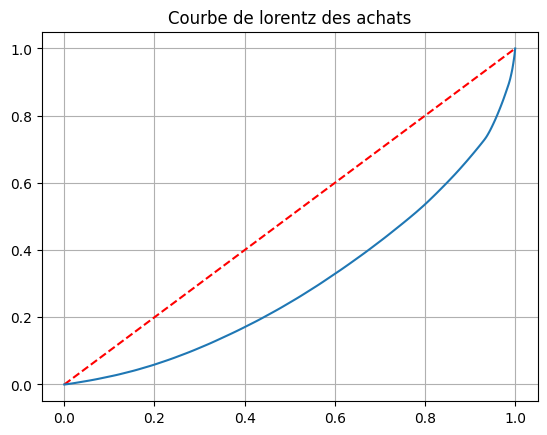

In [87]:
achat = table_fus_sans_gros_client[table_fus_sans_gros_client['price'] > 0]
ach = achat['price'].values
n = len(ach)
lorenz = np.cumsum(np.sort(ach)) / ach.sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

xaxis = np.linspace(0 - 1 / n, 1 + 1 / n, n + 1)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red')
ax=plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de lorentz des achats")
plt.grid(True)
plt.show()

In [88]:
#calcul du nouveau coeeficient de gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini= 2*S
round(gini,2)

0.4

En retirant les 4 plus gros clients, cela a très peu d'influence sur la courbe de lorentz et le coefficient de gini

In [89]:
#examen de ce qu'ont acheté les 4 plus gros clients
gros_client = ['c_1609', 'c_6714', 'c_3454', 'c_4938']
achat_gros_client = table_fus[table_fus['client_id'].isin(gros_client)]
article_achete = achat_gros_client.groupby(by=['client_id', 'id_prod'])['price'].count().reset_index()
article_achete

,client_id,id_prod,price
0,c_1609,0_0,65
1,c_1609,0_1,14
2,c_1609,0_10,2
3,c_1609,0_1000,22
4,c_1609,0_1001,14
...,...,...,...
4439,c_6714,2_46,6
4440,c_6714,2_57,1
4441,c_6714,2_62,5
4442,c_6714,2_7,9


Les 4 plus gros clients sont probalblement des professionnels qui achètent sur le site lapage pour revendre les produits car les articles sont achetés plusieurs fois


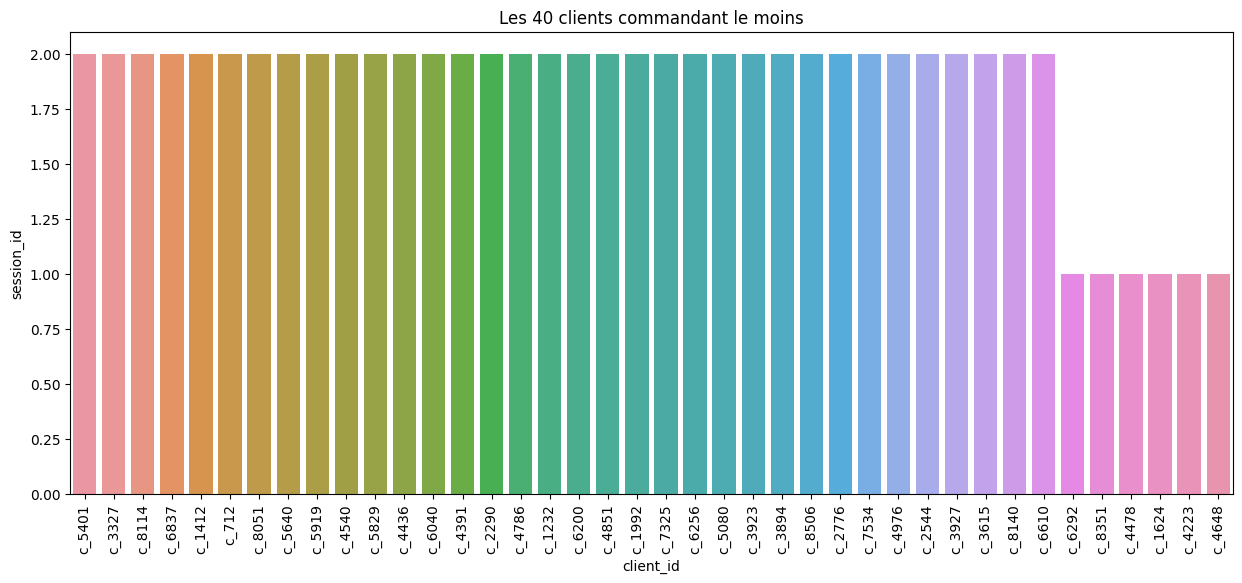

In [90]:
#clients se connectant le moins
plt.figure(figsize=(15, 6))
ax= sns.barplot(data = flop_10_session, x='client_id', y='session_id')
plt.xticks(rotation=90)
plt.title('Les 40 clients commandant le moins')
plt.show()

panier moyen par client par session

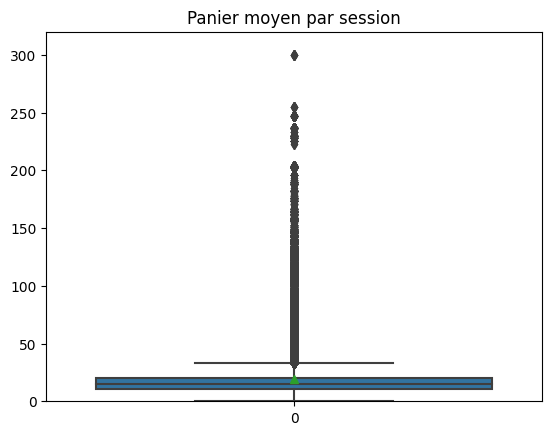

In [91]:
pan_moy = table_fus[['client_id','price','categ','session_id']]
pan_moy=pan_moy.groupby('session_id')['price'].mean()
ax= sns.boxplot(data = pan_moy, showmeans=True)
ax.set_ylim(0, 320)
plt.title('Panier moyen par session')
plt.show()

jour de la semaine ou les clients commande le plus

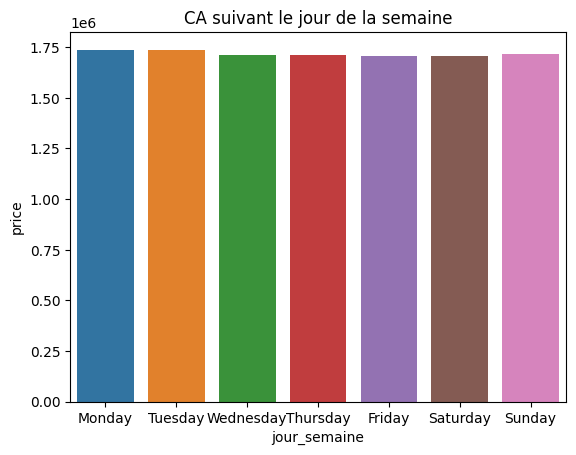

In [92]:
table_fus['jour_semaine'] = table_fus['date1'].dt.day_name()
jour_sem = table_fus.groupby(['jour_semaine'])['price'].sum().reset_index()
ordre_jour = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

jour_sem['jour_semaine'] = pd.Categorical(jour_sem['jour_semaine'], categories=ordre_jour, ordered=True)
jour_sem = jour_sem.sort_values('jour_semaine')

ax = sns.barplot(data=jour_sem, x='jour_semaine', y='price')
plt.title('CA suivant le jour de la semaine')
plt.show()

In [93]:
jour_sem

,jour_semaine,price
1,Monday,1738482.35
5,Tuesday,1733963.79
6,Wednesday,1709400.86
4,Thursday,1712148.08
0,Friday,1704973.90
2,Saturday,1706743.84
3,Sunday,1716960.73


## **Profil des clients**

Répartion des ventes entre les hommes et les femmes

In [94]:
tab_client = table_fus.groupby(['client_id','sex'])['price'].sum().reset_index()


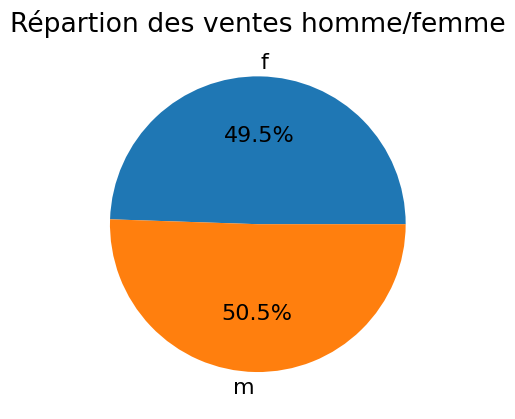

In [95]:
# regroupement des ventes par sexe
tab_client_sex = table_fus.groupby('sex')['price'].sum().reset_index()
#affichage des données en graphique cammenbert
tab_client_sex['price'] = tab_client_sex['price'].astype(float)
plt.rcParams['font.size'] = 16
ax = plt.pie(data=tab_client_sex, x='price', labels=tab_client_sex['sex'], autopct = '%0.1f%%')
plt.title('Répartion des ventes homme/femme')
plt.show()


In [96]:
print(plt.title)

<function title at 0x7ab116340280>


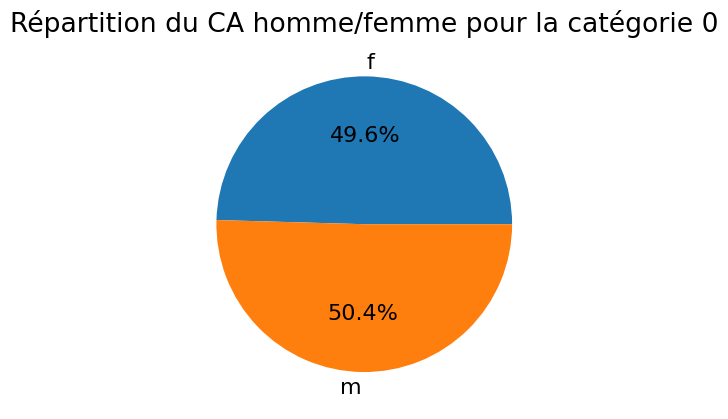

In [97]:
# repartion homme / femme par categorie
tab_client_produit_sex = table_fus.groupby(['categ','sex'])['price'].sum().reset_index()
tab_client_produit_sex['price'] = tab_client_produit_sex['price'].astype(float)
#produit de la categorie 0
catg0 = tab_client_produit_sex.where(tab_client_produit_sex['categ']==0)
catg0.dropna(inplace=True)
plt.rcParams['font.size'] = 16
plt.pie(data=catg0, x='price', labels=catg0['sex'], autopct = '%0.1f%%')
plt.title('Répartition du CA homme/femme pour la catégorie 0')
plt.show()


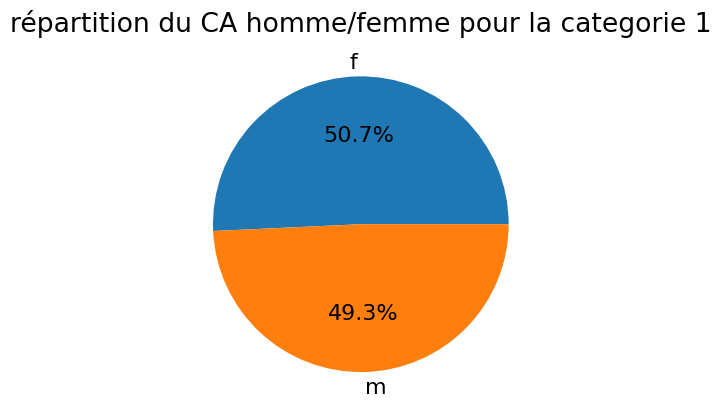

In [98]:
#produit de la categorie 1
catg1 = tab_client_produit_sex.where(tab_client_produit_sex['categ']==1)
catg1.dropna(inplace=True)
plt.pie(data=catg1, x='price', labels=catg1['sex'], autopct = '%0.1f%%')
plt.title('répartition du CA homme/femme pour la categorie 1')
plt.show()

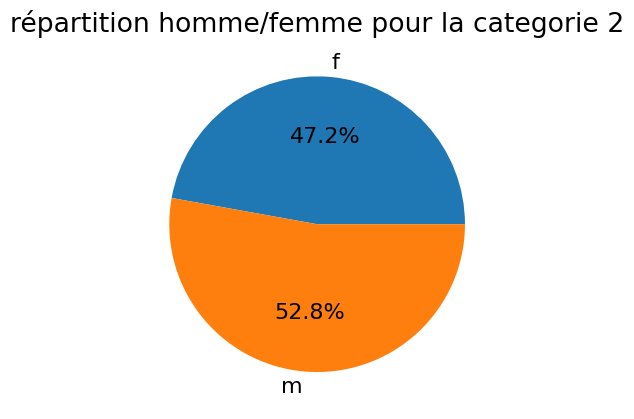

In [99]:
#produit de la catégorie 2
catg2 = tab_client_produit_sex.where(tab_client_produit_sex['categ']==2)
catg2.dropna(inplace=True)
plt.pie(data=catg2, x='price', labels=catg1['sex'], autopct = '%0.1f%%')
plt.title('répartition homme/femme pour la categorie 2')
plt.show()

**Age moyen des clients**

In [100]:
# Calcul de l'âge moyen et médian uniquement pour les clients uniques
table_fus_client_unique = table_fus.drop_duplicates(subset=['client_id'])
table_fus_client_unique['age'] = 2023 - table_fus_client_unique['birth']

age_moyen_clients_uniques = table_fus_client_unique['age'].mean().astype(int)
age_median_clients_uniques = table_fus_client_unique['age'].median().astype(int)

print("L'âge moyen des clients uniques est de :", round(age_moyen_clients_uniques), "ans")
print("L'âge médian des clients uniques est de :", round(age_median_clients_uniques), "ans")


L'âge moyen des clients uniques est de : 44 ans
L'âge médian des clients uniques est de : 44 ans


<ipython-input-100-0b210b4cec54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_fus_client_unique['age'] = 2023 - table_fus_client_unique['birth']


In [101]:
#Age moyen par categorie (client unique)
table_fus['age'] = 2023 - table_fus['birth']
age_moy_categ0 = table_fus_client_unique.where(table_fus['categ']==0)
age_moy_categ0.dropna(inplace=True)
age_moy0 = age_moy_categ0['age'].mean().astype(int)

age_moy_categ1 = table_fus_client_unique.where(table_fus['categ']==1)
age_moy_categ1.dropna(inplace=True)
age_moy1 = age_moy_categ1['age'].mean().astype(int)

age_moy_categ2 = table_fus_client_unique.where(table_fus['categ']==2)
age_moy_categ2.dropna(inplace=True)
age_moy2 = age_moy_categ2['age'].mean().astype(int)

print('age moyen des clients achetant des livres de la categorie 0 est de' , round(age_moy0))
print('age moyen des clients achetant des livres de la categorie 1 est de' , round(age_moy1))
print('age moyen des clients achetant des livres de la categorie 2 est de' , round(age_moy2))


age moyen des clients achetant des livres de la categorie 0 est de 48
age moyen des clients achetant des livres de la categorie 1 est de 46
age moyen des clients achetant des livres de la categorie 2 est de 26


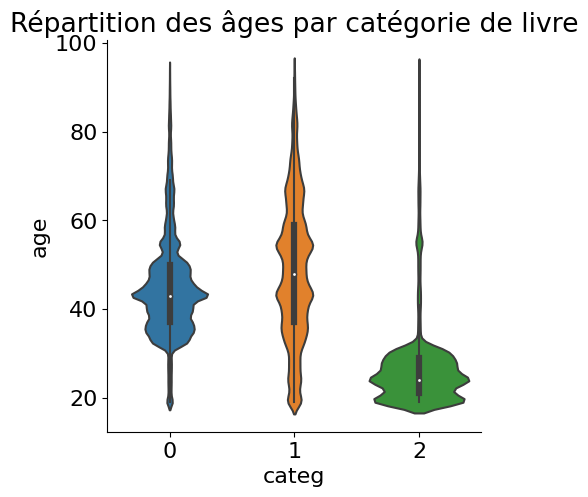

In [102]:
#violin plot des ages par catégorie de livre
sns.catplot(data=table_fus, x='categ', y='age', kind='violin')
plt.title('Répartition des âges par catégorie de livre')
plt.show()

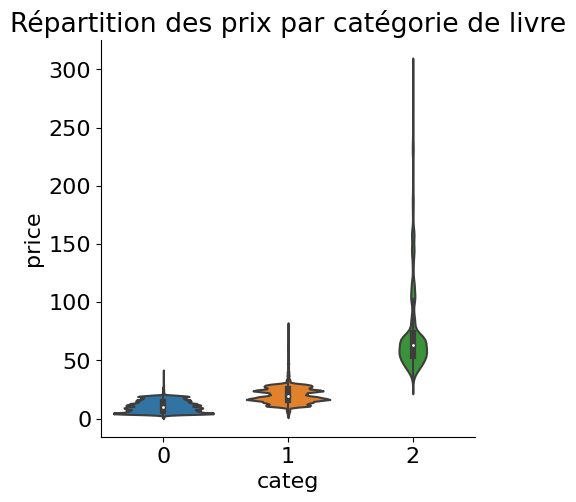

In [103]:
#violin plot des prix par catégorie de livre
sns.catplot(data=table_fus, x='categ', y='price', kind='violin')
plt.title('Répartition des prix par catégorie de livre')
plt.show()

In [104]:
table_fus

,id_prod,date,session_id,client_id,heure,date1,sex,birth,price,categ,année,mois,jour,année_mois,jour_semaine,age
0,0_1259,2021-03-01,s_1,c_329,00:01:07.843138,2021-03-01,f,1967,11.99,0,2021,03,1,2021-03,Monday,56
1,0_1390,2021-03-01,s_2,c_664,00:02:26.047414,2021-03-01,m,1960,19.37,0,2021,03,1,2021-03,Monday,63
2,0_1352,2021-03-01,s_3,c_580,00:02:38.311413,2021-03-01,m,1988,4.50,0,2021,03,1,2021-03,Monday,35
3,0_1458,2021-03-01,s_4,c_7912,00:04:54.559692,2021-03-01,f,1989,6.55,0,2021,03,1,2021-03,Monday,34
4,0_1358,2021-03-01,s_5,c_2033,00:05:18.801198,2021-03-01,f,1956,16.49,0,2021,03,1,2021-03,Monday,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687293,1_508,2023-02-28,s_348444,c_3573,23:49:03.148402,2023-02-28,f,1996,21.92,1,2023,02,28,2023-02,Tuesday,27
687294,2_37,2023-02-28,s_348445,c_50,23:51:29.318531,2023-02-28,f,1994,48.99,2,2023,02,28,2023-02,Tuesday,29
687295,1_695,2023-02-28,s_348446,c_488,23:53:18.929676,2023-02-28,f,1985,26.99,1,2023,02,28,2023-02,Tuesday,38
687296,0_1547,2023-02-28,s_348447,c_4848,23:58:00.107815,2023-02-28,m,1953,8.99,0,2023,02,28,2023-02,Tuesday,70


# **Partie 2 : Analyse ciblée sur les clients**

## **Correlation entre le genre et les categories des livres**

In [105]:
#test chi2 entre sex et categ (1 variable qualitative et une variable quantitative)
from scipy.stats import chi2_contingency
data = table_fus

table_contingence = pd.crosstab(data['sex'], data['categ'])
chi2, p, dof, expected = chi2_contingency(table_contingence)

print("Résultats du test du chi2 :")
print(f"Chi2 : {chi2}")
print(f"P-value : {p}")
print(f"Degrés de liberté : {dof}")
print("Tableau des valeurs attendues :")
print(expected)


Résultats du test du chi2 :
Chi2 : 157.58964260811467
P-value : 6.023430519385375e-35
Degrés de liberté : 2
Tableau des valeurs attendues :
[[207073.63745566 117306.4562737   18183.90627064]
 [208385.36254434 118049.5437263   18299.09372936]]


La valeur de F n'est pas très élevée ce qui indique qu'il n'y a une différence entre les hommes et les femmes mais pas très importantes sur le prix moyen des achats. La p-value très proche de 0 indique que les différences entre les hommes et les femmes sont significatives et ne sont pas du au hasard

 les résultats du test du chi2 suggèrent que les différences observées dans le tableau de contingence ne sont pas statistiquement significatives. Il n'y a pas suffisamment de preuves pour conclure que les variables sont liées de manière significative

In [106]:
table_fus.shape

(687298, 16)

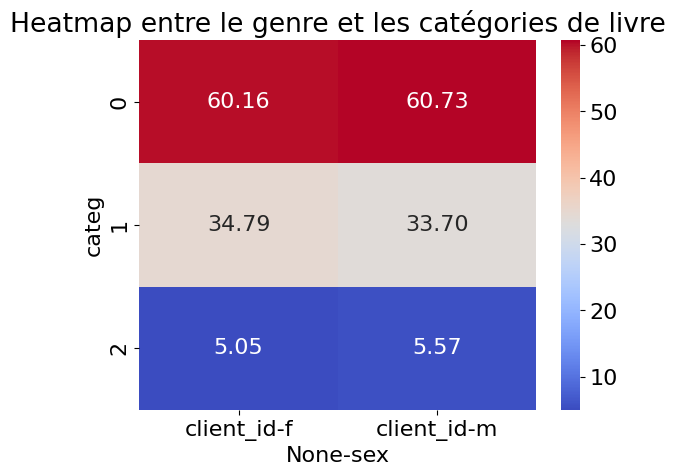

In [107]:
genre_achat = table_fus[['client_id', 'sex', 'categ']]
data = genre_achat.pivot_table(index='categ', columns='sex', aggfunc='count')

total_categ = data.sum()
pourcent = (data / total_categ) * 100

plt.title("Heatmap entre le genre et les catégories de livre")
sns.heatmap(pourcent, cmap="coolwarm", annot=True, fmt='.2f')
plt.show()


Le heat map ne montre pas de différence significative entre sex et categ contrairement au chi2 dont nous avons vu qu'il y a avait une certaine dépendance

## **Correlation entre l'age des clients et le montant total des achats**

In [108]:
#correlation entre price et categ (2 variables qualitatives)
#calcul du coefficient de pearson
total_achat = table_fus.groupby(['age'])['price'].sum().reset_index()
correlation_matrix = total_achat.corr()
correlation_age_price = correlation_matrix.loc['age', 'price']
print("Coefficient de corrélation entre 'age' et 'price':", correlation_age_price)


Coefficient de corrélation entre 'age' et 'price': -0.7795279083176264


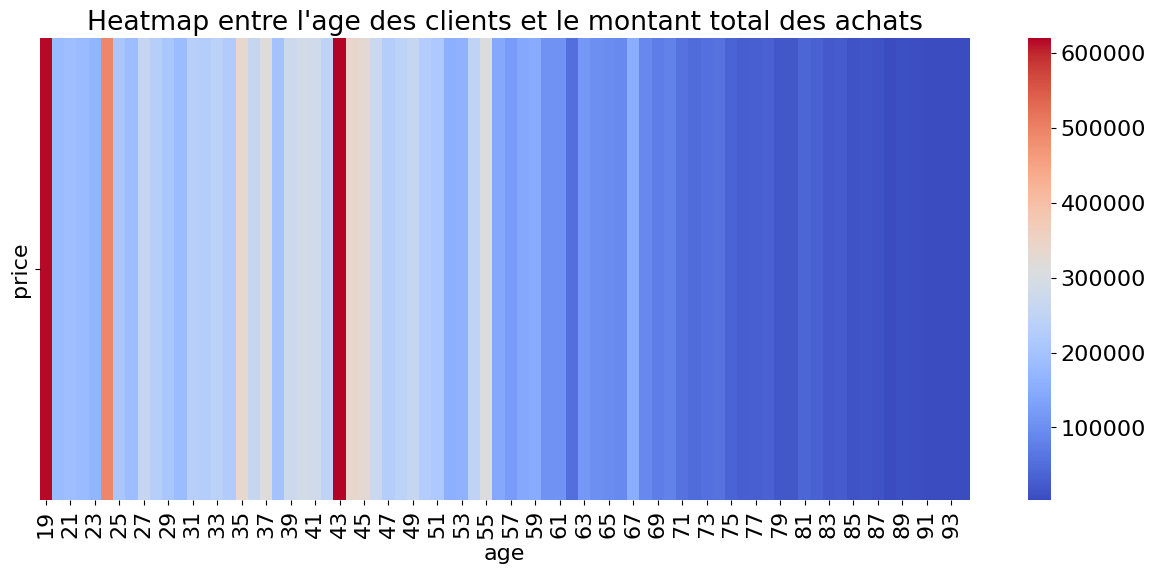

In [109]:
data = total_achat.pivot_table( columns='age', values='price')
plt.figure(figsize=(15, 6))
sns.heatmap(data, cmap="coolwarm")
plt.title("Heatmap entre l'age des clients et le montant total des achats")
plt.show()


## **Correlation entre l'age des clients et la fréquence d'achat**

In [110]:
#correlation entre l'age et la fréquence d'achat (2 variables quantitatives)
#calcul du coefficient de pearson
freq_achat = table_fus.groupby(['age'])['session_id'].count().reset_index()

correlation_matrix = freq_achat.corr()
correlation_age_session = correlation_matrix.loc['age', 'session_id']
print("Coefficient de corrélation entre 'age' et 'session_id':", correlation_age_session)

Coefficient de corrélation entre 'age' et 'session_id': -0.53653893740111


on a ici une correlation négative faible entre la fréquence d'achat et l'age des clients

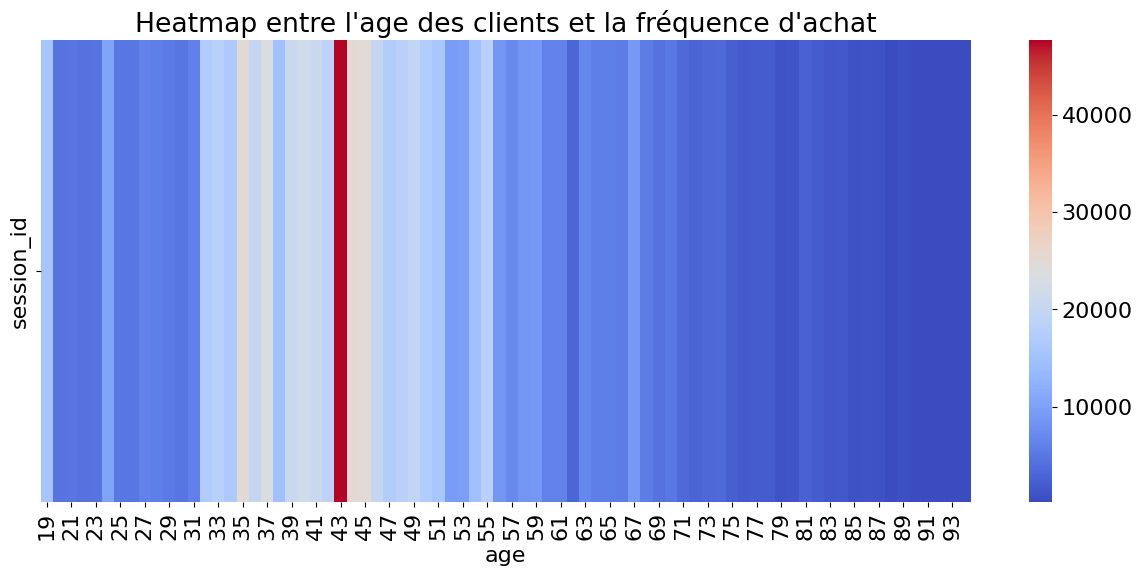

In [111]:
data = freq_achat.pivot_table( columns='age', values='session_id')
plt.figure(figsize=(15, 6))
sns.heatmap(data, cmap="coolwarm")
plt.title("Heatmap entre l'age des clients et la fréquence d'achat")
plt.show()

In [112]:
data

age,19,20,21,22,23,24,25,26,27,28,...,85,86,87,88,89,90,91,92,93,94
session_id,15495,4491,4709,4369,4522,10387,4985,4847,6188,5808,...,848,946,764,278,558,336,312,170,238,202


## **Correlation entre l'age des clients  et la taille du panier moyen**

In [113]:
panier_moyen = table_fus.groupby(['age'])['price'].mean().reset_index()
correlation_matrix = panier_moyen.corr()
correlation_age_panniermoyen = correlation_matrix.loc['age', 'price']
print("Coefficient de corrélation entre l'age des clients et le pannier moyen:", correlation_age_panniermoyen)

Coefficient de corrélation entre l'age des clients et le pannier moyen: -0.5452946644245004


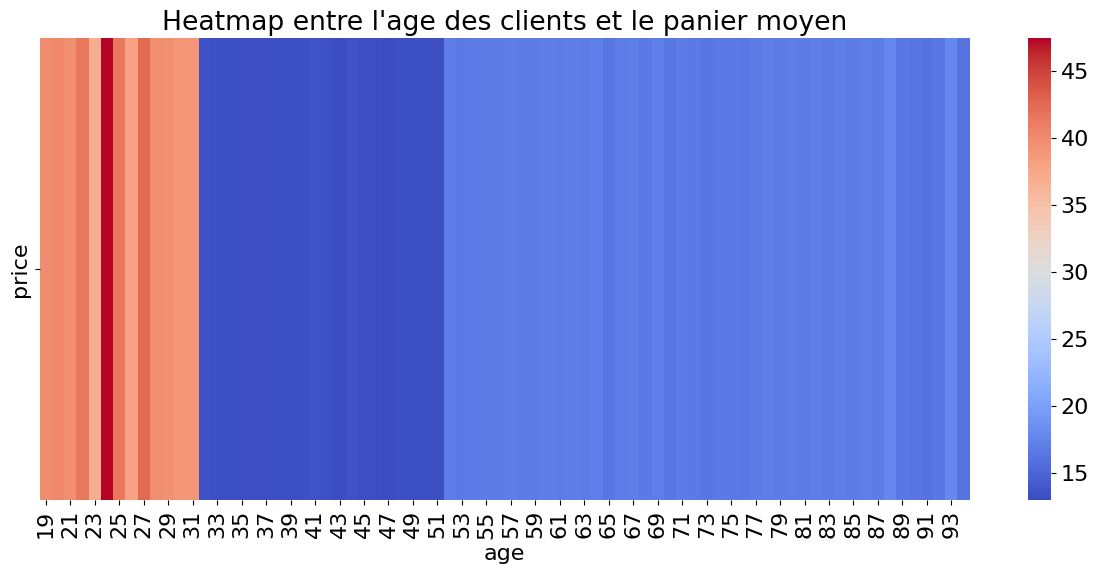

In [114]:
data = panier_moyen.pivot_table( columns='age', values='price')
plt.figure(figsize=(15, 6))
sns.heatmap(data, cmap="coolwarm")
plt.title("Heatmap entre l'age des clients et le panier moyen")
plt.show()

## **Correlation entre l'age et la catégorie des livres achetés**

In [115]:
age_categ = table_fus.groupby(['age'])['categ'].mean().reset_index()
correlation_matrix = age_categ.corr()

correlation_age_categ = correlation_matrix.loc['age', 'categ']
print("Coefficient de corrélation entre l'age des clients et le pannier moyen:", correlation_age_categ)


Coefficient de corrélation entre l'age des clients et le pannier moyen: -0.2898924021342743



la correlation entre l'age des clients et le panier moyen est très faible et negative

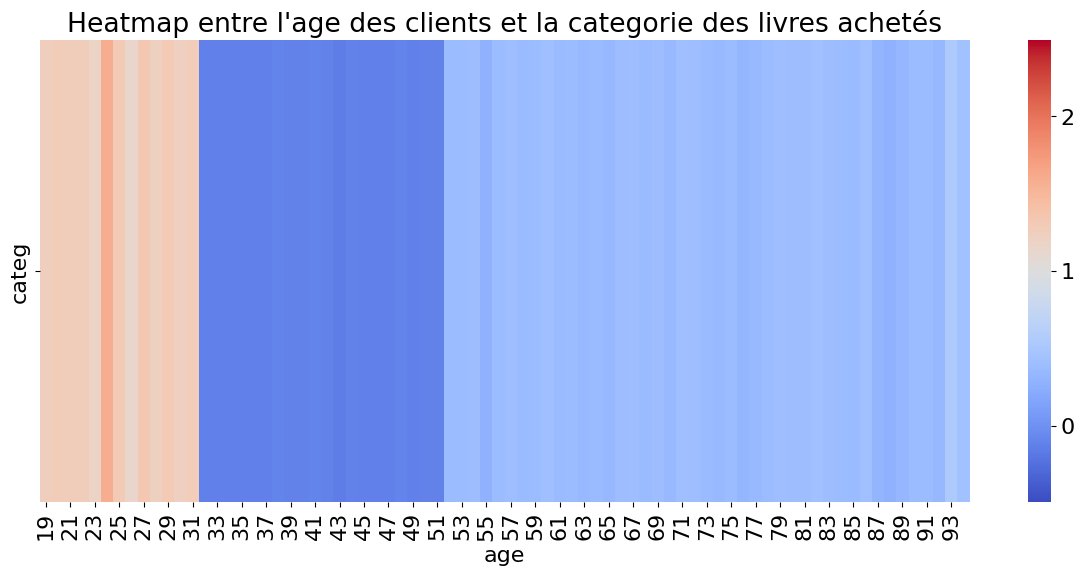

In [116]:
data = age_categ.pivot_table( columns='age', values='categ')
plt.figure(figsize=(15, 6))
ax = sns.heatmap(data, cmap="coolwarm", vmin=0, vmax=2)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0.33, 1, 1.67])
cbar.set_ticklabels(['0', '1', '2'])

plt.title("Heatmap entre l'age des clients et la categorie des livres achetés")
plt.show()